In [2]:
# import the libraries needed
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

## Preparing the train and test dataset
---
- We have obtained the dataset from https://www.openpowerlifting.org/.
- For ease of data preprocessing, we have only taken data from the 'SBD' event where contestants are required to do all three exercises, namely Squat, Bench, Deadlift.
- From there, we randomised the data rows in the original CSV file and took out a total of 4,000 data points to be used for our train and test dataset. This dataset was further split into 3,000 for train and 1,000 for test.

In [3]:
train_test_combined = pd.read_csv('../datasets/train_test_combined.csv')
train_test_combined.head()

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Alana Carrasco,F,SBD,Raw,29.5,24-34,24-39,FR-O,68.60,72,...,Yes,USA,AZ,USAPL,IPF,27/8/2017,USA,AZ,NaN,Sun Devil Classic
1,Even Dysjaland,M,SBD,Raw,19.5,20-23,19-23,Juniors 19-23,94.65,105,...,Yes,NaN,NaN,NSF,IPF,13/6/2015,Norway,NaN,Ganddal,Klubbstevne
2,Alessandro Favorito,M,SBD,Single-ply,39.0,35-39,24-39,Open,89.40,90,...,Yes,Italy,NaN,FIPL,IPF,6/11/2004,Italy,NaN,Marina Di Carrara,Coppa Italia A Squadre
3,Sydney Martinez,F,SBD,Single-ply,NaN,NaN,NaN,Girls,55.16,56,...,Yes,USA,NaN,THSWPA,NaN,25/1/2014,USA,TX,JUNIOR HIGH,CARRIZO SPRINGS INVITATIONAL
4,Navy Villar,F,SBD,Single-ply,NaN,NaN,NaN,Girls,55.61,56,...,Yes,NaN,NaN,THSWPA,NaN,18/1/2018,USA,TX,Sadler,S&S Lady Rams Meet


In [4]:
# Split combined dataset into train and test
from sklearn.model_selection import train_test_split

train,test = train_test_split(train_test_combined, test_size = 0.25, random_state = 0)
train.to_csv('../datasets/train.csv', index = False)
test.to_csv('../datasets/test.csv', index = False)

print(train.shape)
print(test.shape)

(3000, 41)
(1000, 41)


## Exploratory Data Analysis (EDA)
---

In [5]:
# Import train dataset into a dataframe
train_df = pd.read_csv('../datasets/train.csv')
train_df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Hanne Bingle,F,SBD,Wraps,61.0,60-64,60-69,M5,73.70,75,...,NaN,UK,NaN,GPC,GPC,1/9/2020,Slovakia,NaN,Trnava,European Championships
1,Mohamed Reda,M,SBD,Raw,NaN,NaN,NaN,Open,99.58,105,...,Yes,Egypt,NaN,AfricanPF,IPF,20/10/2018,Morocco,NaN,Meknes,African & Arab Powerlifting Championships
2,Pauline Reeves,F,SBD,Single-ply,NaN,45-49,NaN,Open,129.30,90+,...,Yes,England,NaN,BAWLA,IPF,26/4/2003,UK,NaN,Livingstone,British Masters' Championships
3,Edie Montalvo,F,SBD,Single-ply,NaN,NaN,NaN,Girls,71.12,75,...,Yes,NaN,NaN,THSWPA,NaN,10/2/2018,USA,TX,Weslaco,Weslaco Girls Invitational Powerlifting Meet
4,Faith Bailey,F,SBD,Single-ply,NaN,NaN,NaN,Girls,78.83,82.3,...,Yes,NaN,NaN,THSWPA,NaN,7/3/2020,USA,TX,Bay City,Region 4 Division 3 Meet


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              3000 non-null   object 
 1   Sex               3000 non-null   object 
 2   Event             3000 non-null   object 
 3   Equipment         3000 non-null   object 
 4   Age               1704 non-null   float64
 5   AgeClass          1998 non-null   object 
 6   BirthYearClass    1816 non-null   object 
 7   Division          2998 non-null   object 
 8   BodyweightKg      2955 non-null   float64
 9   WeightClassKg     2968 non-null   object 
 10  Squat1Kg          1351 non-null   float64
 11  Squat2Kg          1334 non-null   float64
 12  Squat3Kg          1293 non-null   float64
 13  Squat4Kg          11 non-null     float64
 14  Best3SquatKg      2869 non-null   float64
 15  Bench1Kg          1334 non-null   float64
 16  Bench2Kg          1319 non-null   float64


### Identifying numeric and categorical variables
---
- Let's first identify numeric and categorical variables using information from above and the data's
description text.

In [7]:
# Identify numeric variables
numeric_df = train_df[['Age', 'BodyweightKg', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Best3SquatKg',
                      'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Best3BenchKg', 'Deadlift1Kg', 'Deadlift2Kg',
                      'Deadlift3Kg', 'Best3DeadliftKg', 'TotalKg', 'Wilks', 'Glossbrenner', 'Goodlift']]

categorical_df = train_df[['Sex', 'Equipment', 'AgeClass', 'BirthYearClass', 'Division', 'WeightClassKg', 
                          'Place', 'Country', 'State', 'Federation', 'ParentFederation']]

In [8]:
numeric_df.describe()

,Age,BodyweightKg,Squat1Kg,Squat2Kg,Squat3Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Best3DeadliftKg,TotalKg,Wilks,Glossbrenner,Goodlift
count,1704.000000,2955.000000,1351.000000,1334.000000,1293.000000,2869.000000,1334.000000,1319.000000,1287.000000,2844.000000,1326.000000,1300.000000,1242.000000,2828.000000,2814.000000,2775.000000,2775.000000,2773.000000
mean,28.166667,80.919797,112.584330,97.066387,30.874169,169.591042,85.195727,62.538431,-15.998819,107.292219,161.538469,137.320869,26.993760,184.916821,462.034023,346.214937,323.902822,64.162380
std,11.929664,21.835479,138.440295,162.382321,191.442886,70.974763,81.843312,108.230793,127.620094,52.661941,102.020644,149.747254,208.370629,66.036699,180.937825,82.314126,82.167457,15.814134
min,4.500000,25.300000,-400.000000,-430.910000,-426.380000,-255.000000,-310.000000,-265.350000,-340.500000,-185.000000,-295.000000,-399.160000,-365.000000,-190.000000,92.990000,111.060000,99.210000,18.570000
25%,19.000000,64.765000,85.000000,75.625000,-160.000000,112.500000,55.000000,42.500000,-125.000000,61.230000,122.500000,120.000000,-200.000000,130.000000,307.500000,289.155000,264.590000,53.170000
50%,24.500000,79.700000,145.000000,145.000000,107.500000,162.500000,100.000000,90.000000,-57.500000,104.330000,180.000000,177.500000,125.000000,185.000000,455.000000,345.830000,324.880000,64.520000
75%,34.500000,93.615000,200.000000,202.500000,190.000000,220.000000,135.000000,137.500000,107.500000,145.000000,222.500000,230.000000,205.000000,235.000000,597.242500,398.590000,377.830000,75.220000
max,80.500000,185.020000,401.430000,421.840000,439.980000,455.000000,280.000000,320.000000,294.840000,383.290000,387.820000,357.500000,360.000000,390.090000,1157.500000,704.440000,672.820000,121.050000


### Exploring variables regarding contestant's personal information
---

/Users/kaiyi/Library/Python/3.9/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


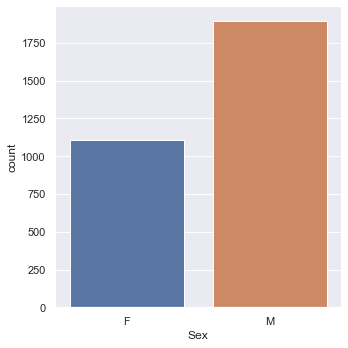

In [9]:
# Explore the distribution of the genders
sb.catplot('Sex', data = categorical_df, kind = 'count')

### Observation
---
There seems to be an imbalance in the no. of females to males, with female accounting only for 37% of datapoints. This could be a source of problem when building models later on that uses the variable `Sex`.

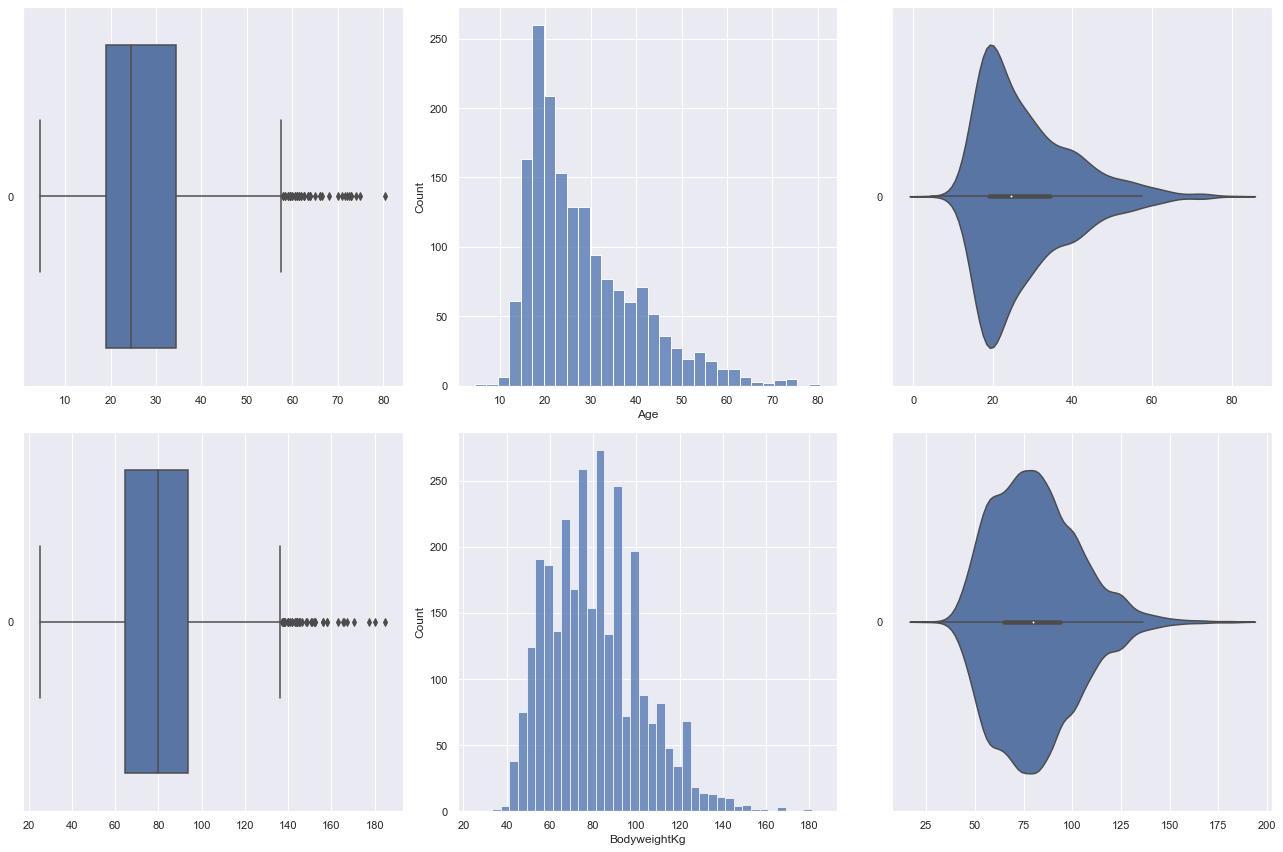

In [10]:
# Explore numeric variables related to a contestant's personal data: Age, BodyweightKg
f, axes = plt.subplots(2, 3, figsize = (18, 12))
numeric_personalData_df = numeric_df[['Age', 'BodyweightKg']]

count = 0

for var in numeric_personalData_df:
    sb.boxplot(data = numeric_personalData_df[var], orient = 'h', ax = axes[count, 0])
    sb.histplot(data = numeric_personalData_df[var], ax = axes[count, 1])
    sb.violinplot(data = numeric_personalData_df[var], orient = 'h', ax = axes[count, 2])
    count += 1
    
plt.tight_layout()

### Observation
---

#### Age:
- Considering box plot, seems that most powerlifters are young adults, from the age of 19 to 35, based on the interquartile range.
- Interestingly, there are quite a few outliers, that are above ~60 years old.
- How are the older powerlifters performing compared to their younger counterparts?
- From violin plot, distribution seems to be positively skewed.

#### BodyWeight (kg)
- Considering box plot, the majority of data seems to be concentrated within ~63 to 95kg.
- Some powerlifters seem to have a much higher weight, slightly less than double the median of 70kg.
- Is there a weight class for these outliers? 
- From violin plot, distribution seem to be less skewed.

### Exploring variables regarding weight lifted
---

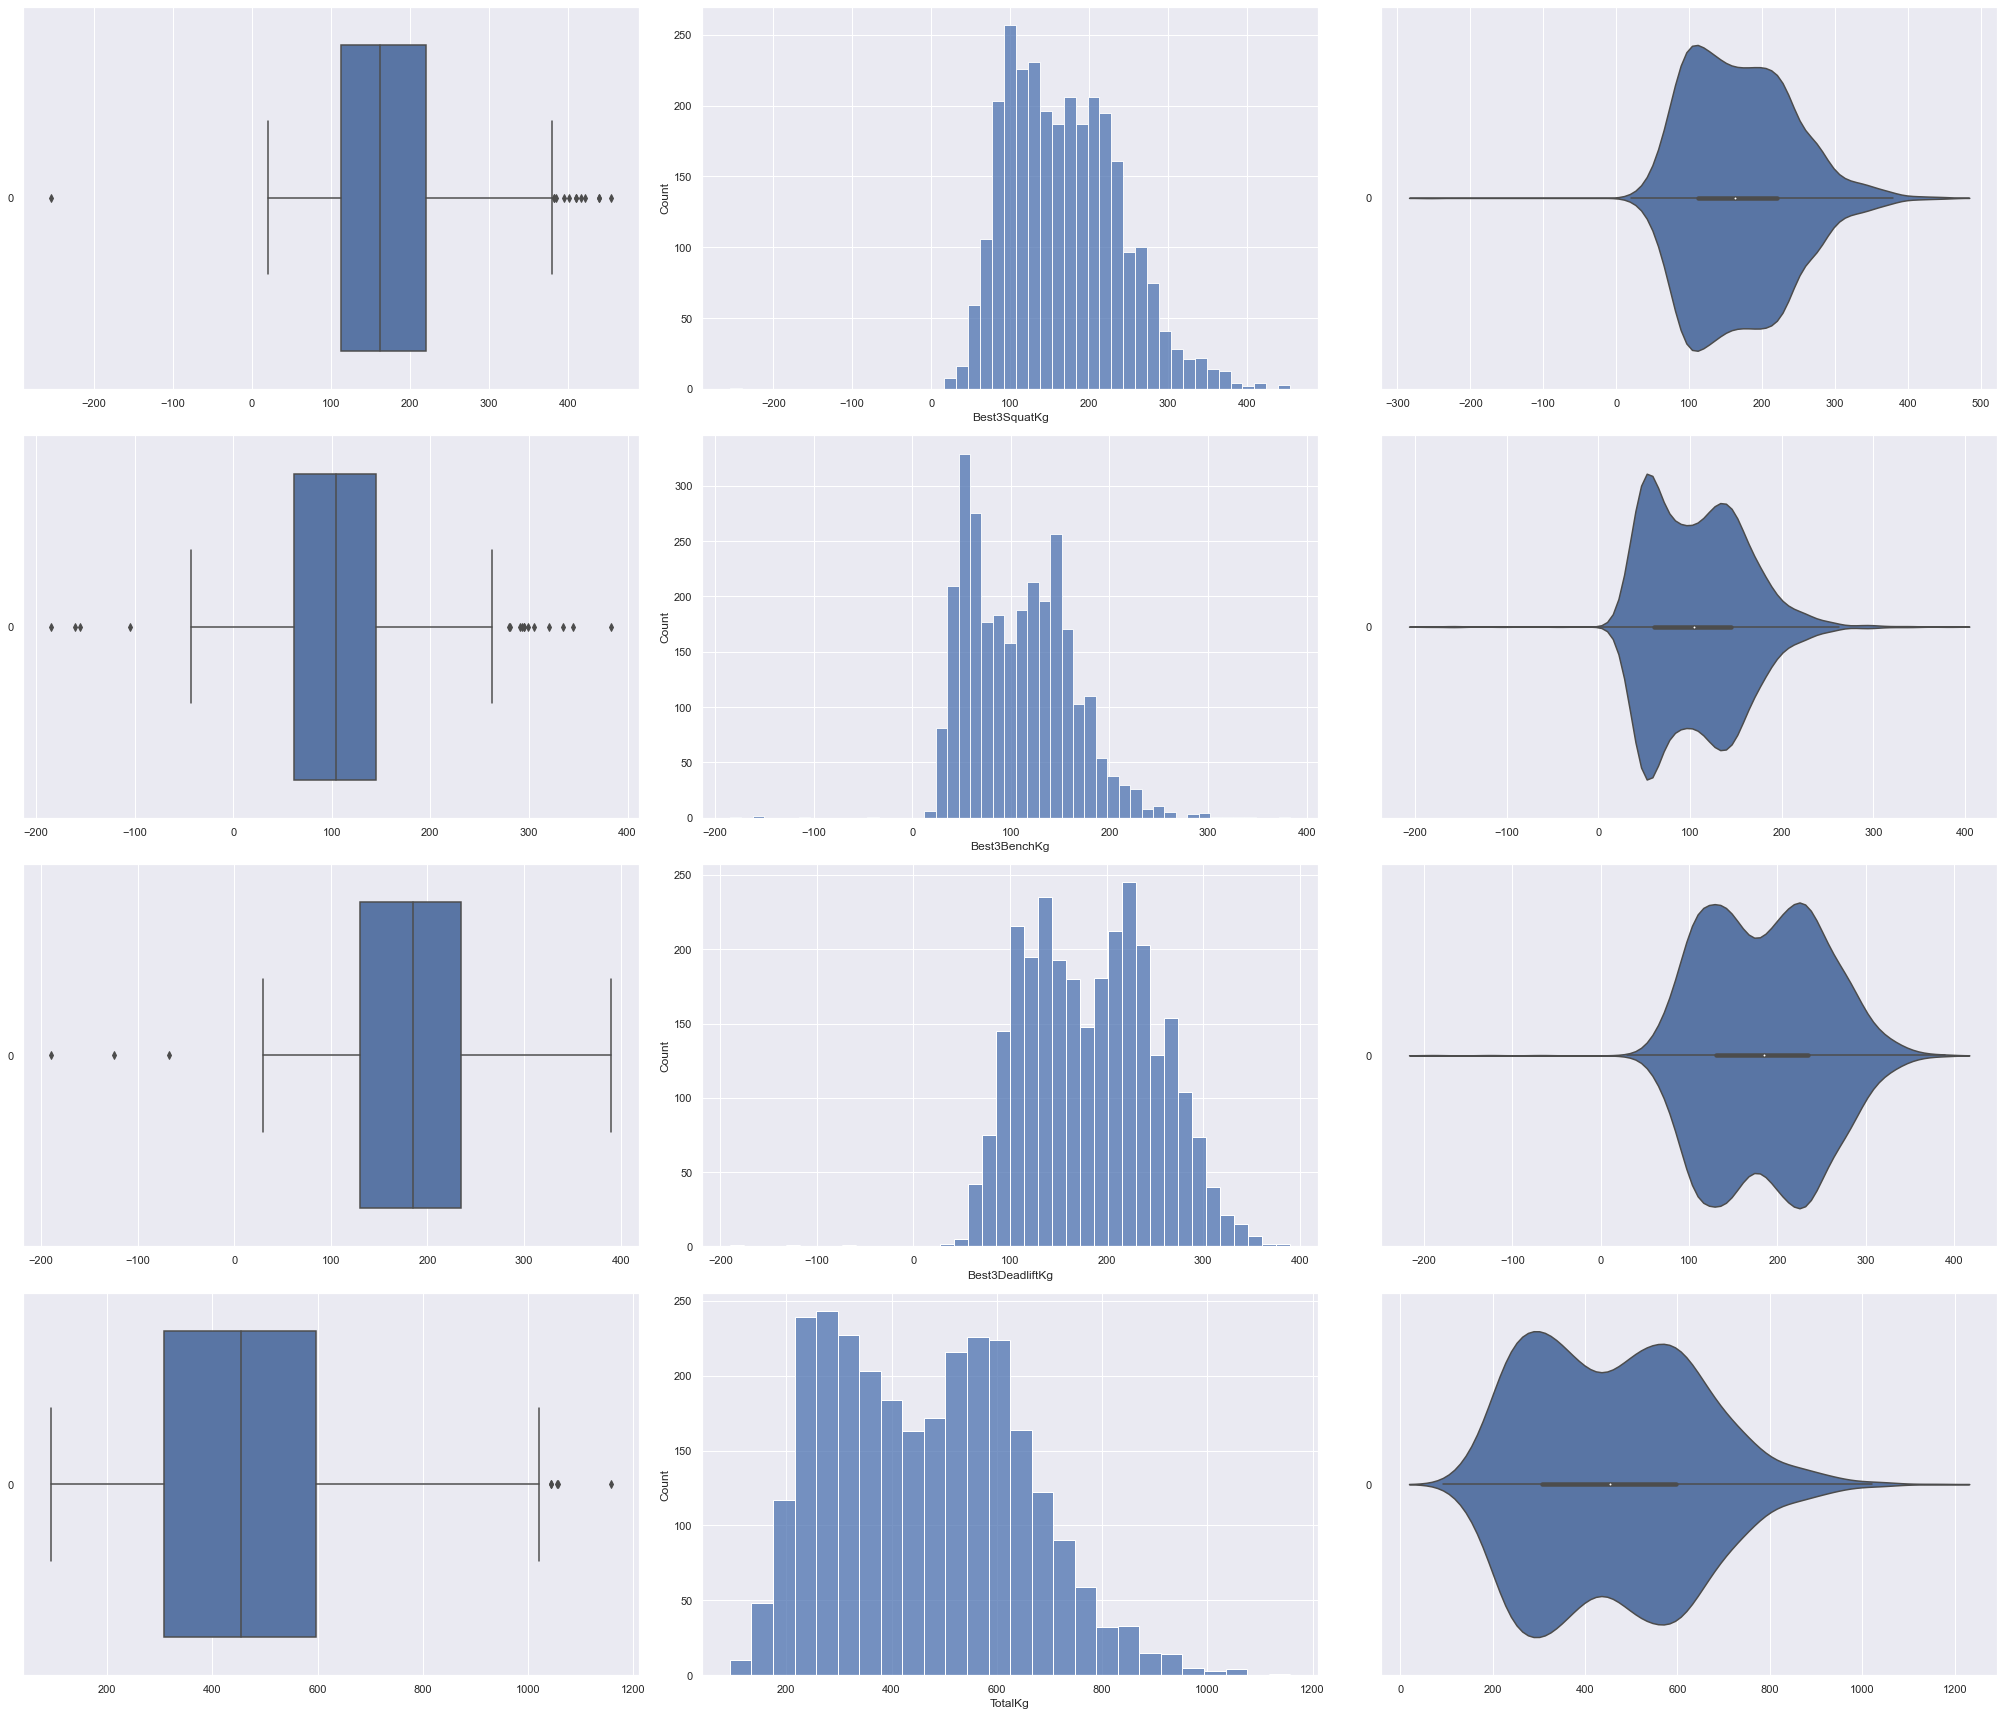

In [11]:
# For this section, we will use `Best3SquatKg`, `Best3BenchKg`, `Best3DeadliftKg` and `TotalKg`.
# TotalKg is the sum of `Best3SquatKg`, `Best3BenchKg`, and `Best3DeadliftKg`, if all three lifts were a success.

f, axes = plt.subplots(4,3, figsize = (28,24))
weightsLifted_df = numeric_df[['Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg', 'TotalKg']]

count = 0;
for var in weightsLifted_df:
    sb.boxplot(data = weightsLifted_df[var], orient = 'h', ax = axes[count, 0])
    sb.histplot(data = weightsLifted_df[var], ax = axes[count, 1])
    sb.violinplot(data = weightsLifted_df[var], orient = 'h', ax = axes[count, 2])
    count += 1

plt.tight_layout()

In [12]:
weightsLifted_df.skew()

Best3SquatKg       0.459744
Best3BenchKg       0.409997
Best3DeadliftKg    0.055482
TotalKg            0.354901
dtype: float64

### Observation
---
- For every exercise, there seems to have two values about which data is most concentrated about it, as seen by the violin plots having two peaks.
- Observing violin plots and the skewness, Squat exercise seems to have the greatest positive skewness from normal distribution.
- Scale seems to be disturbed by negative values for Squat and Bench, which represent failed Attempts.
- Let's remove these negative values and observe the distributions again.

No. of failed attempts for Squat:  1
No. of failed attempts for Bench:  5
No. of failed attempts for Deadlift:  3


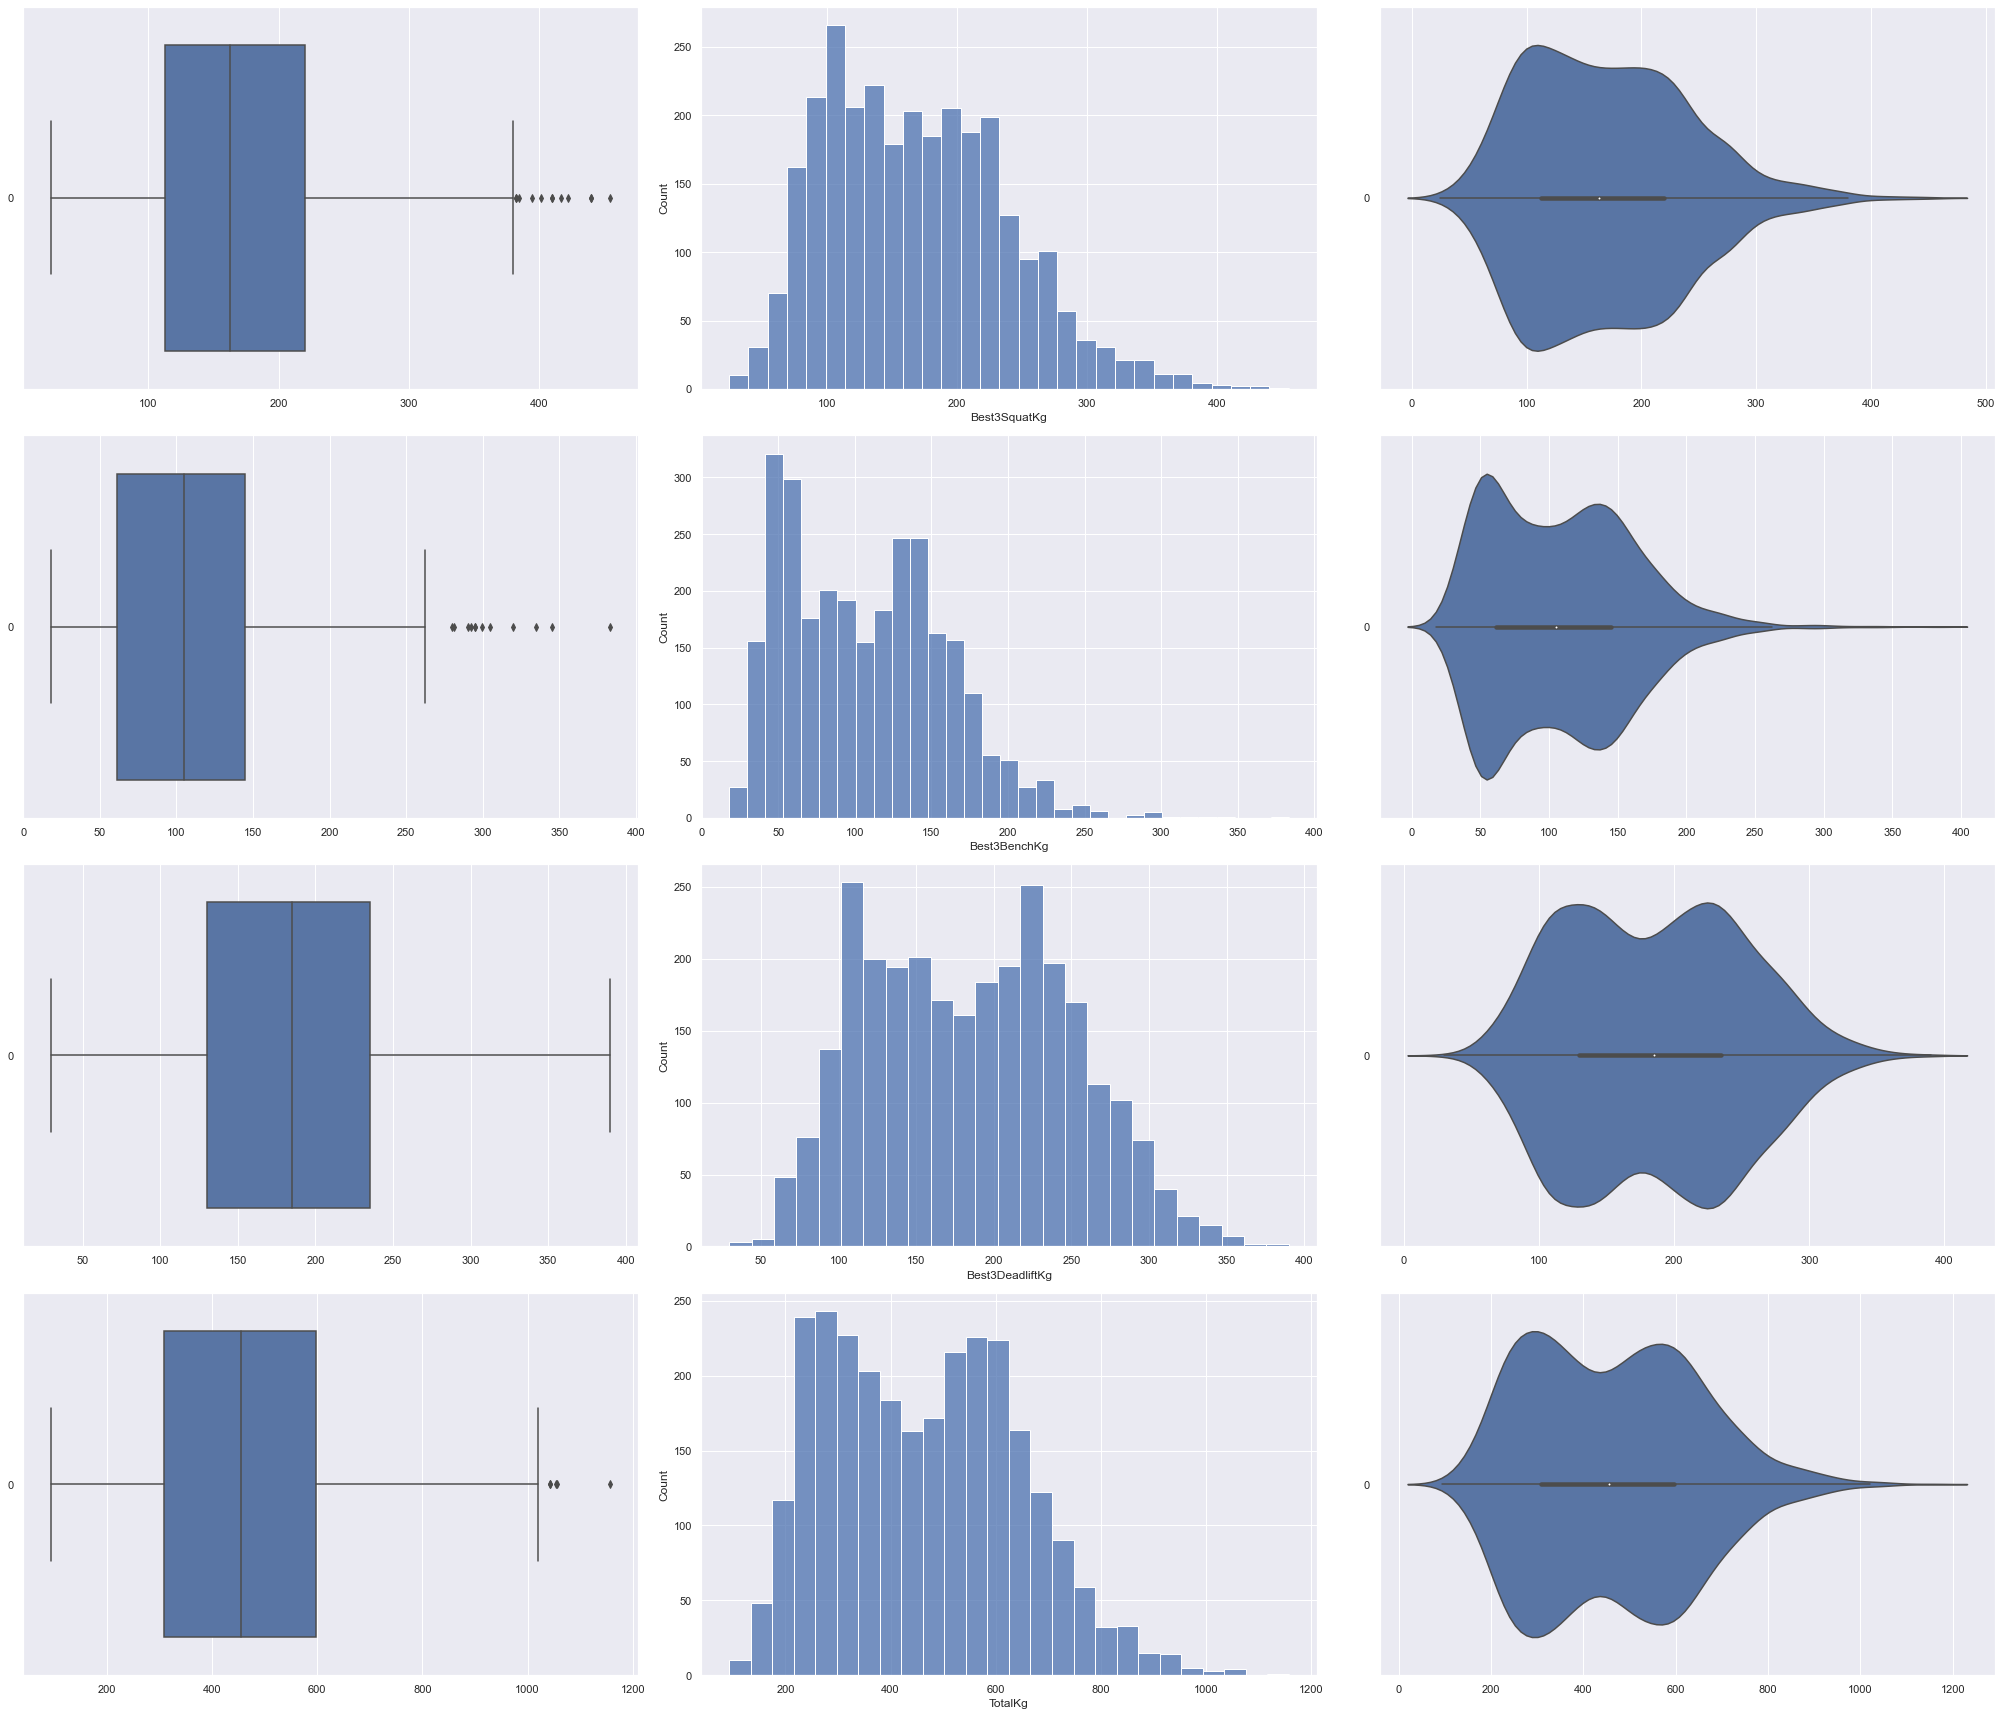

In [13]:
# Removing failed attempts data points
print("No. of failed attempts for Squat: ", weightsLifted_df[weightsLifted_df['Best3SquatKg'] < 0].shape[0])
print("No. of failed attempts for Bench: ", weightsLifted_df[weightsLifted_df['Best3BenchKg'] < 0].shape[0])
print("No. of failed attempts for Deadlift: ", weightsLifted_df[weightsLifted_df['Best3DeadliftKg'] < 0].shape[0])

failedAttempts = weightsLifted_df[(weightsLifted_df['Best3SquatKg'] < 0) 
                                  | (weightsLifted_df['Best3BenchKg'] < 0)
                                 | (weightsLifted_df['Best3DeadliftKg'] < 0)]
weightsLiftedSuccessOnly_df = weightsLifted_df.drop(index = failedAttempts.index, axis = 0)

# Replot visualisations
f, axes = plt.subplots(4,3, figsize = (28,24))

count = 0;
for var in weightsLifted_df:
    sb.boxplot(data = weightsLiftedSuccessOnly_df[var], orient = 'h', ax = axes[count, 0])
    sb.histplot(data = weightsLiftedSuccessOnly_df[var], ax = axes[count, 1])
    sb.violinplot(data = weightsLiftedSuccessOnly_df[var], orient = 'h', ax = axes[count, 2])
    count += 1

plt.tight_layout()

### Observation
---
- After removing failed attempts, concentration of data about the median seems to be more accurately displayed now.
- Squat seems to have the most number of outliers beyond the right whisker with the largest max value, followed by Bench and then Deadlift.
- Comparing interquartile ranges (IQR) for the three exercises, it seems that the IQR for Squat and Deadlift spreads over a larger range as compared to Bench. It is also noted that the distribution for Bench seem to be on the lighter side as compared to the other two exercises, where the third quartile for Bench is almost just slightly more than the first quartile of both Squat and Deadlift.
- On the other hand, deadlift seems to be on the heavier side as compared to the other two exercises. Is it easier to lift heavier weights with deadlift perhaps due to the muscles involved?
<br>
<br>

#### Possible Hunch
---
This may suggest that it is more difficult to lift heavier weights while doing Bench as compared to the other two and the opposite seems to be suggested for Deadlift.

Deadlifts also contribute more to TotalKg than Squats and Bench.

### Exploring Correlations between variables
---
- Not all events do all three exercises which means that not all events would record a `TotalKg` which is the sum of the best from each of the three exercises. For simplicity sake, let's explore only the events where all three exercises are done.
- Firstly, let's explore correlation between `TotalKg` lifted and the contestant's personal information.
- Next, let's explore correlation between `TotalKg` and other factors like `Equipment`, `Division`.
- Lastly, let's explore correlation between the three different exercises.

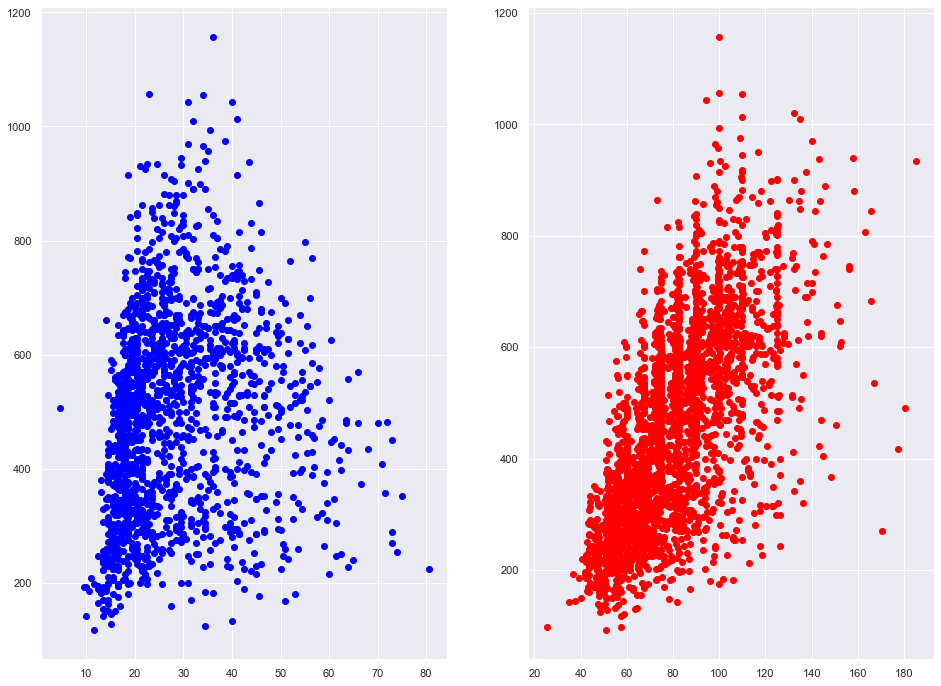

In [14]:
# For the first part, the variables used in exploration would be:
# Numeric: Age, BodyweightKg
correlationWithPersonal_df = train_df[['Age', 'BodyweightKg', 'Sex', 'Country', 'TotalKg']]

f, axes = plt.subplots(1, 2, figsize =(16,12))

axes[0].scatter(x = 'Age', y = 'TotalKg', data = correlationWithPersonal_df, color = 'blue')
axes[1].scatter(x = 'BodyweightKg', y = 'TotalKg', data = correlationWithPersonal_df, color = 'red')

<AxesSubplot:>

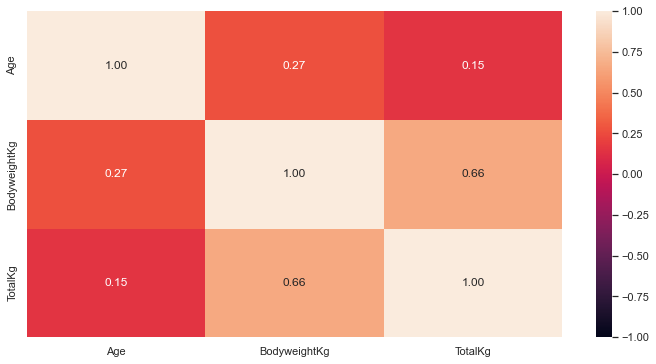

In [15]:
numericCorrelationWithPersonal_df = correlationWithPersonal_df[['Age' , 'BodyweightKg', 'TotalKg']]

f = plt.figure(figsize = (12, 6))
sb.heatmap(numericCorrelationWithPersonal_df.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

### Observation
---

#### Age with TotalKg:
- From scatterplot and heatmap, there is a weak positive correlation of 0.15. However, this is different from what we would expect. We expect to observe a negative correlation between `Age` and `TotalKg`.
<br>
<br>

#### BodyweightKg with TotalKg:
- From scatterplot and heatmap, there is a moderately strong positive correlation of 0.66 between `BodyweightKg` and `TotalKg`. This may make it a useful variable for predicting `TotalKg` as a moderately strong linear relationship is suggested.

#### Possible Hunch
---
`BodyweightKg` seems to be a very important factor in predicting how much weight one can lift while for `Age`, getting older does not necessarily correlate to a decrease in weights lifted. At the same time, `Age` in general may not be that important in predicting how much weight one can lift.

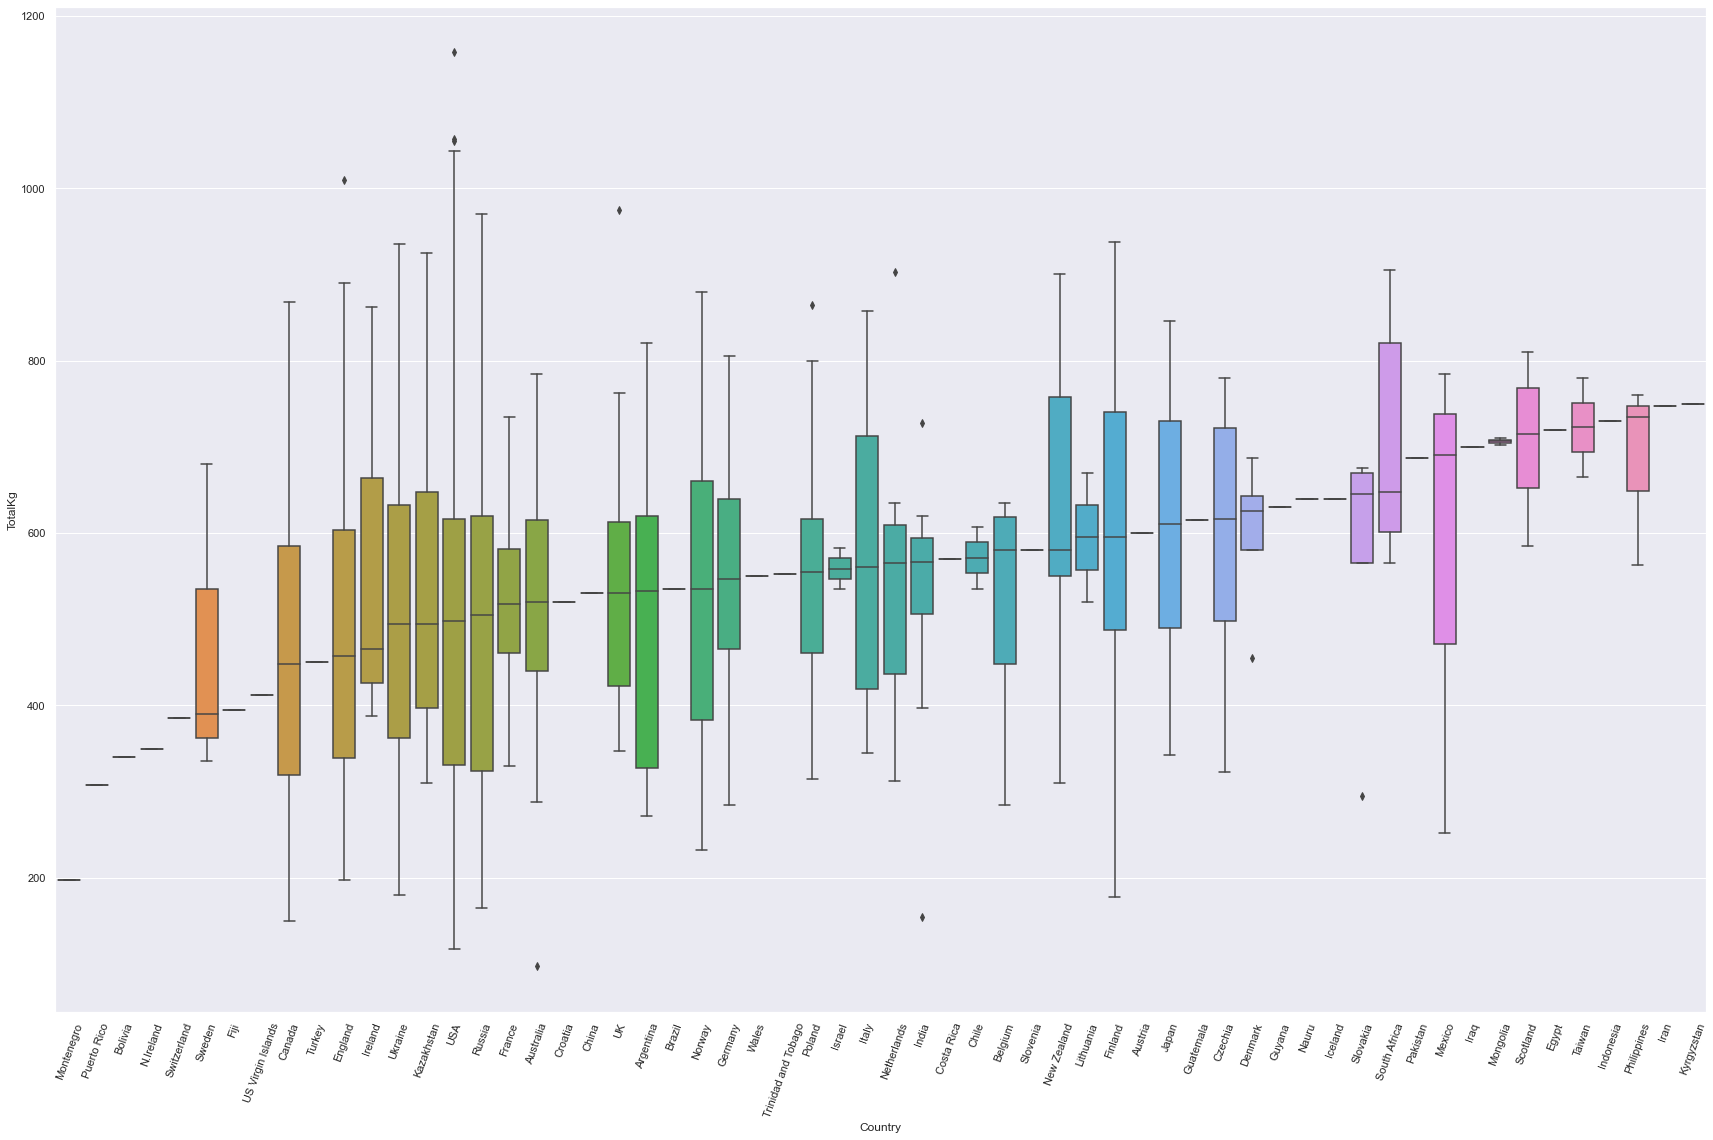

In [16]:
# Categorical: Sex, Country
# f, axes = plt.subplots(1, 2, figsize = (20,12))
f = plt.figure(figsize = (24, 16))


countryOrder = correlationWithPersonal_df.groupby(by = 'Country')['TotalKg'].median().sort_values().index
sb.boxplot(x = 'Country', y = 'TotalKg', data = correlationWithPersonal_df, order = countryOrder)

plt.xticks(rotation=70)
plt.tight_layout()

### Observation
---

#### Country with TotalKg:
- There seems to be differences between each country's boxplot. While there is a distinct increase in median across countries, most countries' interquartile range is large ~200 and this can cause a less distinct difference between each country's boxplot as there is a greater degree of overlap in boxplots.
- However, there seems to be too many countries which obstructs us from gaining meaningful insights. At the same time, there seem to be many countries with only a few contestants (i.e. those countries with a single horizontal line).
- For clearer insights, let's categorise these countries into the region they belong in.
- Regions used would be: North America, Central America, South America, Africa, Europe, Middle East, Asia and Oceania.

In [17]:
# There seems to be a wide range of countries contestant comes from. Let's observe how many unique countries
# are represented
print("No of unique countries: ", len(correlationWithPersonal_df['Country'].value_counts()))
correlationWithPersonal_df['Country'].value_counts()

No of unique countries:  60


USA                    805
Russia                 144
Canada                 124
England                 81
Ukraine                 62
Germany                 39
Norway                  35
Finland                 32
Australia               21
UK                      17
Czechia                 13
Poland                  12
Italy                   10
Kazakhstan               9
New Zealand              9
Japan                    9
India                    8
South Africa             8
Netherlands              7
Belgium                  7
Denmark                  5
Slovakia                 5
Argentina                5
Sweden                   4
Scotland                 4
France                   4
Ireland                  3
Philippines              3
Mexico                   3
Taiwan                   2
Lithuania                2
Mongolia                 2
Israel                   2
Austria                  2
Chile                    2
N.Ireland                2
Kyrgyzstan               1
N

In [18]:
# First, let's replace NaN values with 'No country'
correlationWithPersonal_df['Country'].fillna('No Country', inplace = True)
correlationWithPersonal_df['Country'].value_counts()

/var/folders/dz/456j1vhd5lj65z33cq93dr7m0000gn/T/ipykernel_67279/3647494670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlationWithPersonal_df['Country'].fillna('No Country', inplace = True)


No Country    1474
USA            805
Russia         144
Canada         124
England         81
              ... 
Indonesia        1
Bolivia          1
Pakistan         1
Egypt            1
Turkey           1
Name: Country, Length: 61, dtype: int64

In [19]:
# Due to large number of European countries, european countries are not listed here
# Any countries that are not listed here are european countries
northAmericaCountries = ['USA', 'Canada', 'US Virgin Islands', 'Puerto Rico']
centralAmericaCountries = ['Mexico', 'Costa Rica', 'Guatemala']
southAmericaCountries = ['Argentina', 'Chile', 'Trinidad and Tobago', 'Puerto Rico', 'Bolivia',
                         'Guyana', 'Brazil']
africaCountries = ['South Africa', 'Egypt']
middleEastCountries = ['Iran', 'Israel', 'Iraq']
asiaCountries = ['Japan', 'Kazakhstan', 'India', 'Philippines', 'Mongolia', 'Taiwan', 'China',
                 'Pakistan', 'Kyrgyzstan', 'Indonesia']
oceaniaCountries = ['Australia', 'New Zealand', 'Fiji', 'Nauru']

In [20]:
# Function to cluster countries by region
def getRegion(value):
    
    if value == 'No Country':
        return np.NaN
    
    elif value in northAmericaCountries:
        return 'North America'
    
    elif value in centralAmericaCountries:
        return 'Central America'
    
    elif value in southAmericaCountries:
        return 'South America'
    
    elif value in africaCountries:
        return 'Africa'
    
    elif value in middleEastCountries:
        return 'Middle East'
    
    elif value in asiaCountries:
        return 'Asia'
    
    elif value in oceaniaCountries:
        return 'Oceania'
    
    else:
        return 'Europe'

In [21]:
# Next, let's create a new column based of their region
correlationWithPersonal_df['Region'] = correlationWithPersonal_df['Country'].apply(lambda value : getRegion(value))
correlationWithPersonal_df['Region'].value_counts()

/var/folders/dz/456j1vhd5lj65z33cq93dr7m0000gn/T/ipykernel_67279/3925797614.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlationWithPersonal_df['Region'] = correlationWithPersonal_df['Country'].apply(lambda value : getRegion(value))


North America      931
Europe             497
Asia                37
Oceania             32
South America       11
Africa               9
Central America      5
Middle East          4
Name: Region, dtype: int64

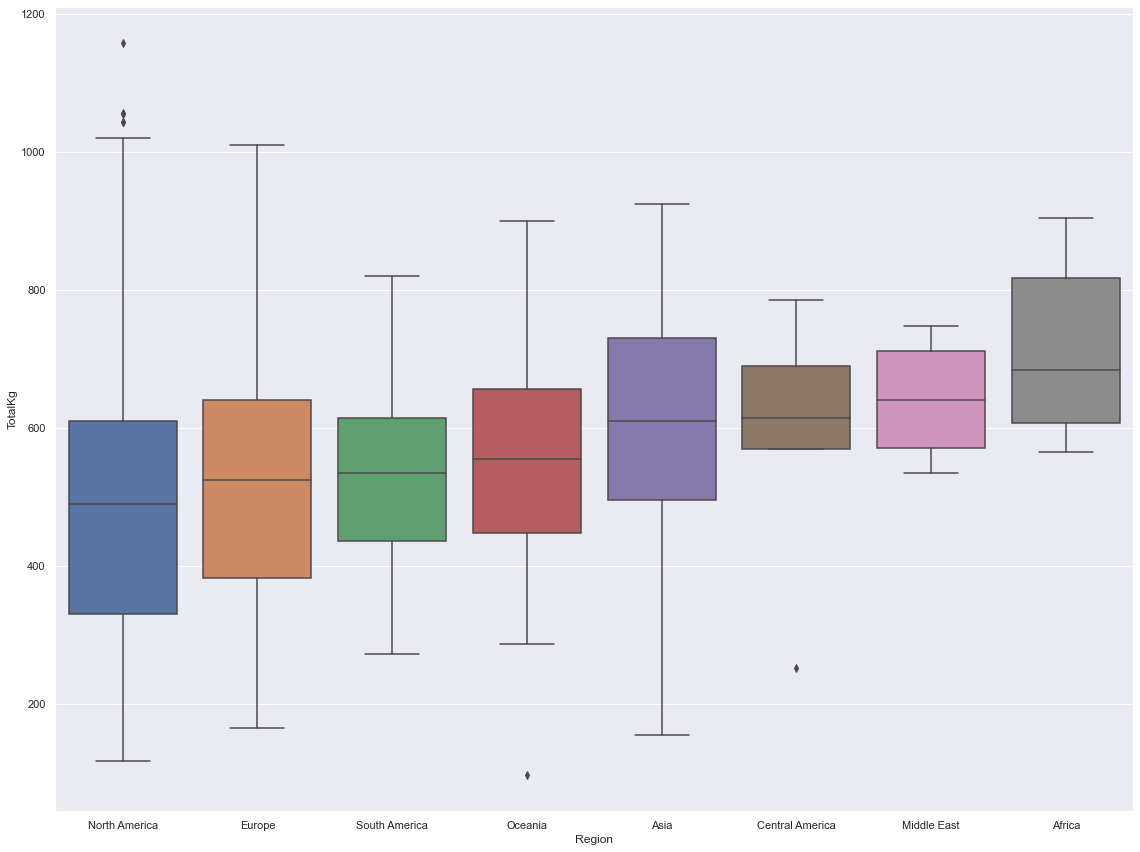

In [22]:
# Finally, let's plot boxplot for TotalKg across Regions
f = plt.figure(figsize = (16, 12))

regionOrder = correlationWithPersonal_df.groupby(by = 'Region')['TotalKg'].median().sort_values().index
sb.boxplot(x = 'Region', y = 'TotalKg', data = correlationWithPersonal_df, order = regionOrder)

plt.tight_layout()

<AxesSubplot:xlabel='Sex', ylabel='TotalKg'>

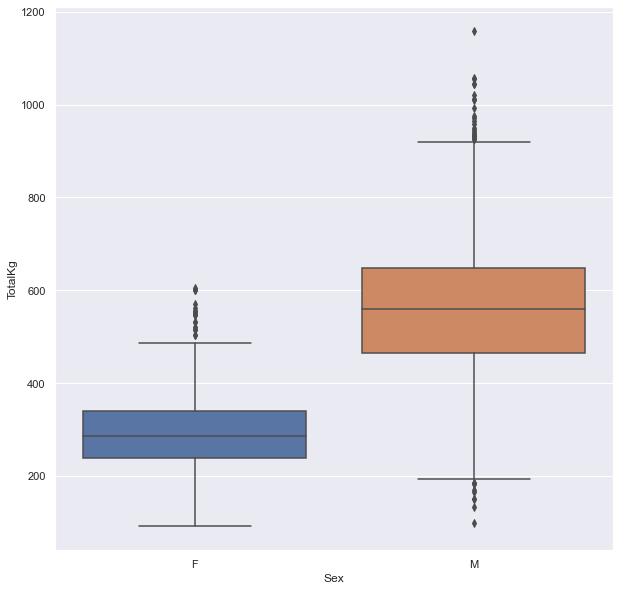

In [23]:
f = plt.figure(figsize = (10,10))

sexOrder = correlationWithPersonal_df.groupby(by = 'Sex')['TotalKg'].median().sort_values().index

sb.boxplot(x = 'Sex', y = 'TotalKg', data = correlationWithPersonal_df, order = sexOrder)

### Observation
---

#### Region with TotalKg:
- There seems to be a moderate correlation between a contestant's `Region` and `TotalKg`. This is seen by the distinct increase in `TotalKg`'s median and there is indeed noticeable differences between each region's boxplot, albeit some degree of overlap in boxplots.
- For North America and Europe where most of the datapoints lies in, there does not seem to have any distinct difference in each region's boxplot.
- However, it is important to take note that there is an imbalance of data points as regions such as Middle East have only 4 datapoints while regions such as North America have 931 data points.
<br>
<br>

#### Sex with TotalKg:
- There is a noticeable difference between Female and Male as seen by the clear difference in boxplot for each gender. For example, median of Male is larger than the Female's third Quartile by a considerable amount of ~50kg. Judging from boxplot alone, it seems that there is a stronger correlation between `Sex` and `TotalKg` than `Region` and `TotalKg`. However, this observation may be biased due to gender having much lesser categories resulting in a much simpler boxplot plot.

#### Possible Hunch
--- 
Overall, there seems to be a noticeable correlation between `Region` and `TotalKg` and `Sex` and `TotalKg` with `Sex` showing a much stronger correlation. Hence, it would seem that `Sex` is a very important factor when predicting `TotalKg`. However, there is a need to take note of the data imbalance especially for `Region` and this may affect the truth of the findings here.

In [24]:
# Next, let's look into the correlation between TotalKg and other factors like `Equipment` and `Division`
# Let's explore the correlation between division and TotalKg
correlationWithEventSpecific_df = train_df[['Equipment', 'Division', 'TotalKg']]

# First find out how many divisions are there
print("No. of unique divisions: ", len(correlationWithEventSpecific_df['Division'].value_counts()))
correlationWithEventSpecific_df['Division'].value_counts()

No. of unique divisions:  387


Open                         819
Girls                        500
MR-O                         136
Juniors                      122
FR-O                          71
                            ... 
Amateur Sub-Juniors 17-19      1
F_OCR_AWPC                     1
M-M3                           1
U16                            1
fs                             1
Name: Division, Length: 387, dtype: int64

In [25]:
# To get a more meaningful comparison, let's consider only divisions that have 50 or more data rows
divisionFreq = correlationWithEventSpecific_df['Division'].value_counts()
selectedDivisionsIndex = divisionFreq[divisionFreq > 50].index
selectedData = correlationWithEventSpecific_df[correlationWithEventSpecific_df['Division'].isin(selectedDivisionsIndex)]

# Verify our filtering
selectedData['Division'].value_counts()

Open           819
Girls          500
MR-O           136
Juniors        122
FR-O            71
Sub-Juniors     68
Name: Division, dtype: int64

<AxesSubplot:xlabel='Division', ylabel='TotalKg'>

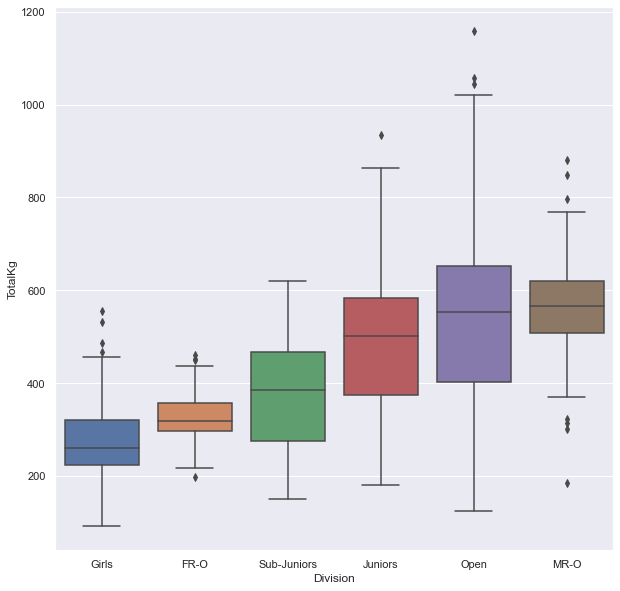

In [26]:
# Let's find out the correlation between TotalKg and Division
f = plt.figure(figsize = (10,10))

divisionOrder = selectedData.groupby(by = 'Division')['TotalKg'].median().sort_values().index
sb.boxplot(x = 'Division', y = 'TotalKg', data = correlationWithEventSpecific_df, order = divisionOrder)

<AxesSubplot:xlabel='Equipment', ylabel='TotalKg'>

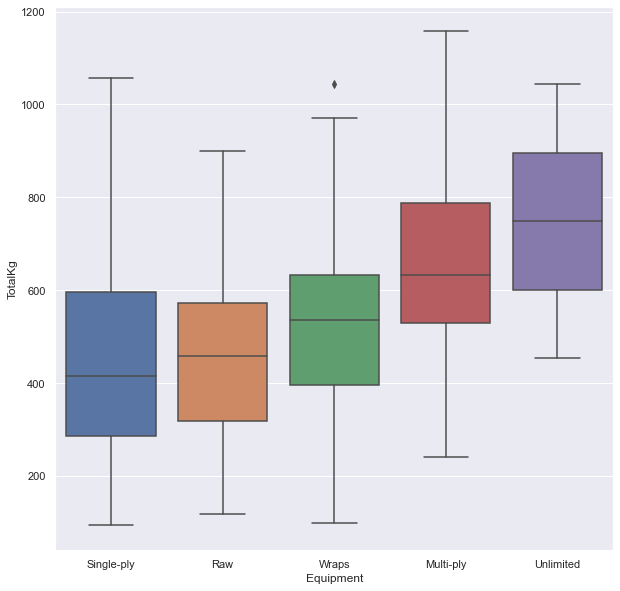

In [27]:
# First, let's explore correlation with `Equipment`
f = plt.figure(figsize = (10, 10))

equipmentOrder = correlationWithEventSpecific_df.groupby(by = 'Equipment')['TotalKg'].median().sort_values().index
sb.boxplot(x = 'Equipment', y = 'TotalKg', data = correlationWithEventSpecific_df, order = equipmentOrder)

### Observation
---

#### Division with TotalKg:
- There do seem to be a strong correlation between `Division` and `TotalKg` as seen by most categories having a distinct boxplot different from the rest. 
- The Girls division's boxplot seem to show noticeable difference from the rest with the median for other categories being equal or greater than the Girl's division third quartile. This reinforces the previous notion that `Sex` does play a significant role in affecting `TotalKg`.
- Interestingly, the Juniors division's distribution has significant overlap with the Open division and seems to be more towards heavier weights than Sub-Juniors.
<br>
<br>
- There seems to be a few surprises within distribution that are worth exploring.
    - We would expect the Junior's division to lift lighter weights than those in the Open division. However, Juniors division's distribution seem to share great similarities with that of Open. However, this boxplot may not be entirely accurate as Juniors division have much less datapoints than Open division (122 compared to 819)
    - Let's also explore the differences between Sub-Juniors and Juniors
<br>
<br>

##### Followup:
- Let's look at the `Age` and `BodyweightKg` for Junior, Open and Sub-Juniors division.
<br>
<br>

#### Equipment with TotalKg:
- Overall, the boxplot for each kind of equipment seems to show a great extent of overlap, suggesting no correlations between `Equipment` and `TotalKg`. However, the boxplot for Multi-ply and Unlimited seem to be distinctly different from the rest which is worth exploring.

In [28]:
# Lets plot the distribution for Age and BodyweightKg for these 4 categories

juniorsDivision_df = train_df[(train_df['Division'] == 'Juniors')]
openDivision_df = train_df[(train_df['Division'] == 'Open')]
subJuniorsDivision_df = train_df[(train_df['Division'] == 'Sub-Juniors')]

chosenDivisions_df = [subJuniorsDivision_df, juniorsDivision_df, openDivision_df]

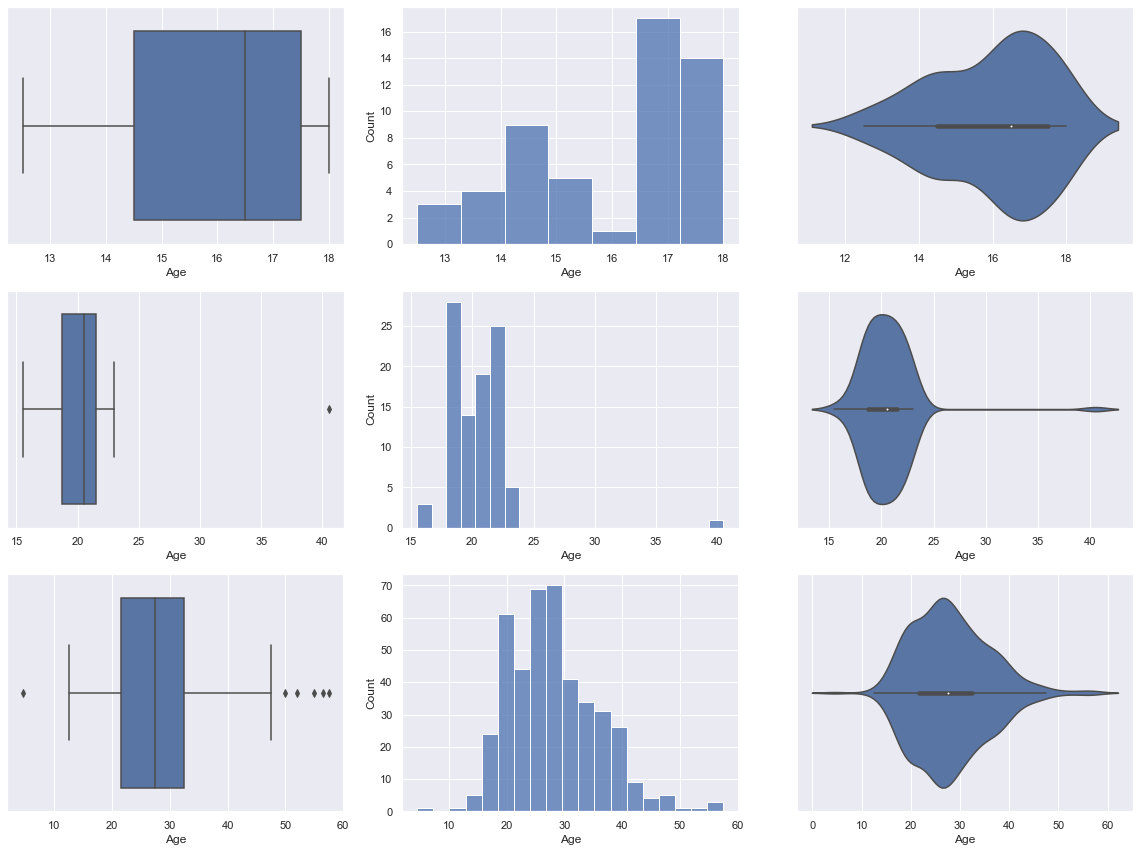

In [29]:
f, axes = plt.subplots(3, 3, figsize = (16,12))

count = 0
for df in chosenDivisions_df:
    sb.boxplot(x = 'Age', data = df, orient = 'h', ax = axes[count, 0])
    sb.histplot(x = 'Age', data = df, ax = axes[count, 1])
    sb.violinplot(x = 'Age', data = df, orient = 'h', ax = axes[count, 2])
    count += 1
    
plt.tight_layout()

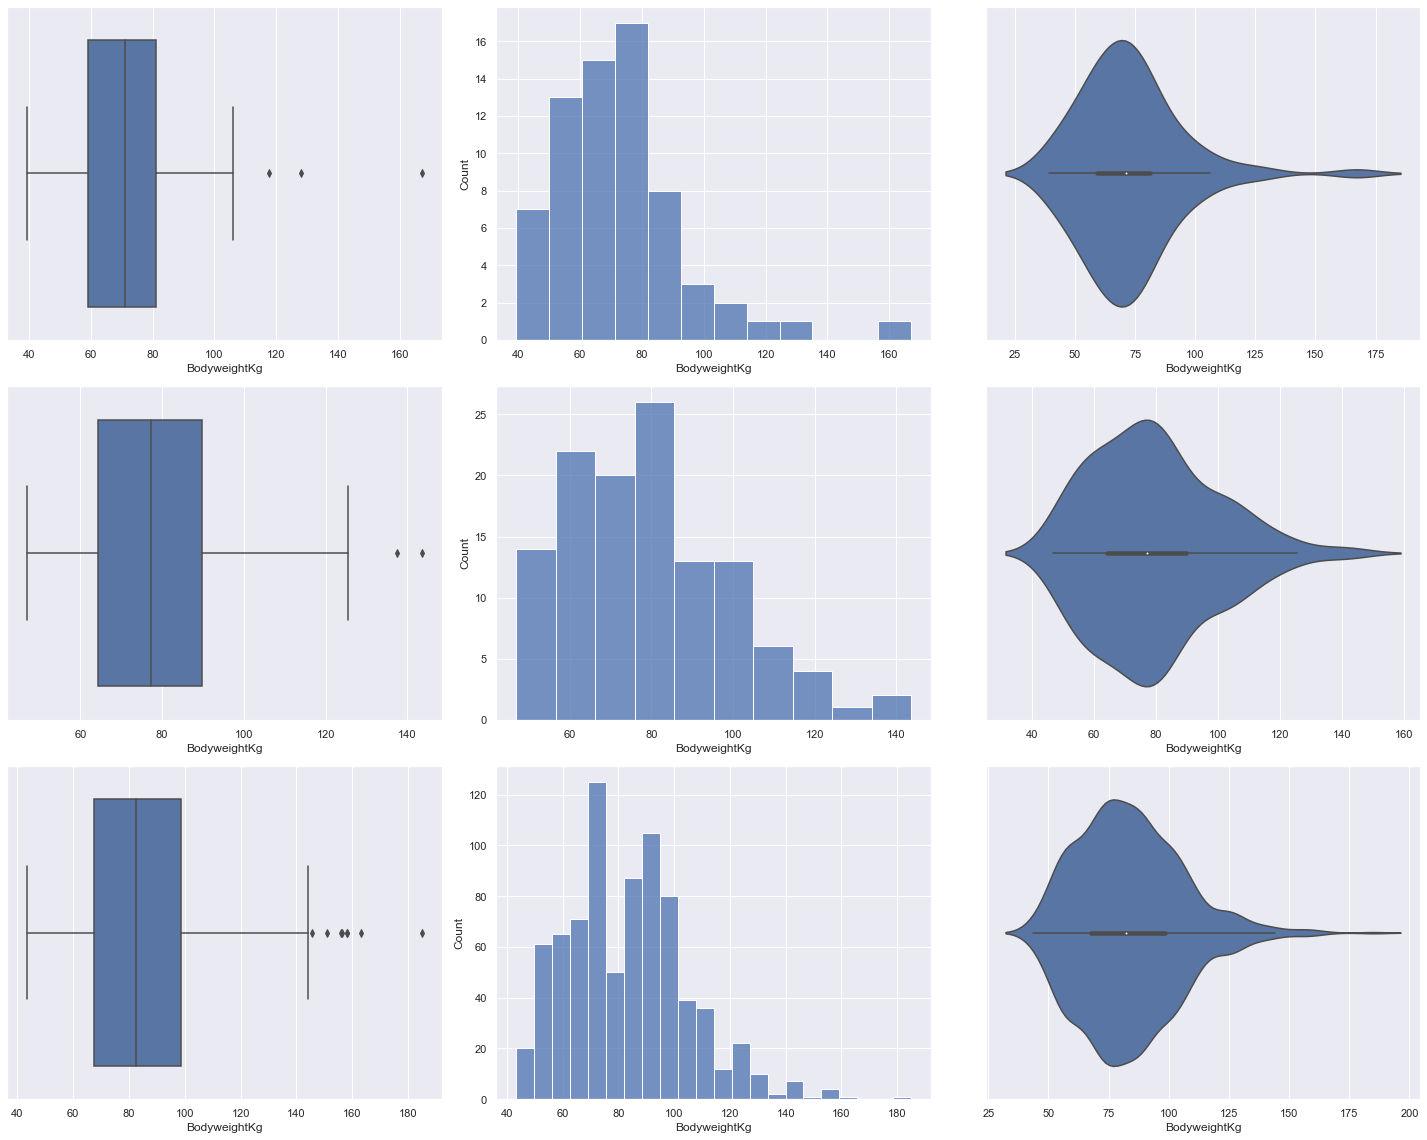

In [30]:
f, axes = plt.subplots(3, 3, figsize = (20,16))

count = 0
for df in chosenDivisions_df:
    sb.boxplot(x = 'BodyweightKg', data = df, orient = 'h', ax = axes[count, 0])
    sb.histplot(x = 'BodyweightKg', data = df, ax = axes[count, 1])
    sb.violinplot(x = 'BodyweightKg', data = df, orient = 'h', ax = axes[count, 2])
    count += 1
    
plt.tight_layout()

### Observation
---

#### Age across Divisions:
- Sub Junior division seems to cater for teenagers, while Junior seem to cater to young adults and Open seems to cater for matured adults. There is a very distinct difference in age distribution as seen by the vastly different boxplots. However, there seems to be some overlap in the age distribution for Open division and the other two division but not vice versa.
- As for skewness of distribution, Sub Junior division has a high negative skew while for Open division, there seems to be a positive skew. Ignoring the outlier in Junior division, the division does not seem to have an obvious skew.
<br>
<br>

#### BodyweightKg across Divisions:
- Comparing Junior and Open division, it seems that the bodyweightKg for Juniors on average, seem to be lighter than those in the Open division, as seen by Junior division having lower quartiles values. Sub Junior division distinctly has the lightest weight on average.
- In all of the divsions, there seems to be a positive skew caused by a few outliers who have very high bodyweights.
<br>
<br>

### Possible Hunch
---
The main variable that distinguish Juniors from other categories is their `Age`, alongside with the fact that a lower bodyweight may put them at a slight disadvantage. This is because we identified that `BodyweightKg` and `TotalKg` have a strong positive correlation earlier. Also, based on the previous boxplot with `Division` against `TotalKg`, the distribution of weights that contestants in the Junior division are able to lift are comparable with those in the Open division as seen by similarities in both boxplot for each division. Combining this two factors, it seems that `Age` is quite an important factor in determining how much one can lift.

## Exploring correlation between performance in Squats, Bench and Deadlifts

In [31]:
sbdBest_df = numeric_df[['Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg', 'TotalKg']]

In [32]:
sbdBestSuccess_df = sbdBest_df[(sbdBest_df['Best3SquatKg'] > 0) 
                                & (sbdBest_df['Best3BenchKg'] > 0)
                                 & (sbdBest_df['Best3DeadliftKg'] > 0)]


<AxesSubplot:>

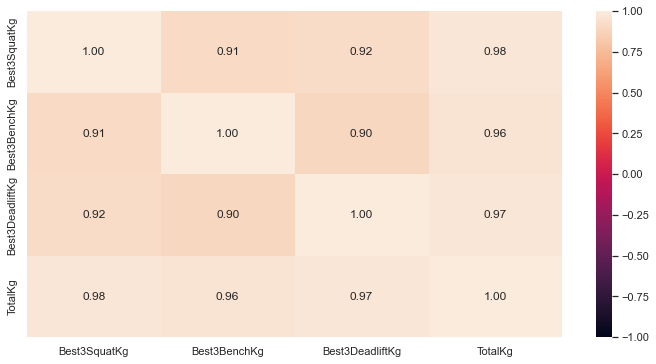

In [33]:
f = plt.figure(figsize = (12, 6))
sb.heatmap(sbdBestSuccess_df.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

<AxesSubplot:>

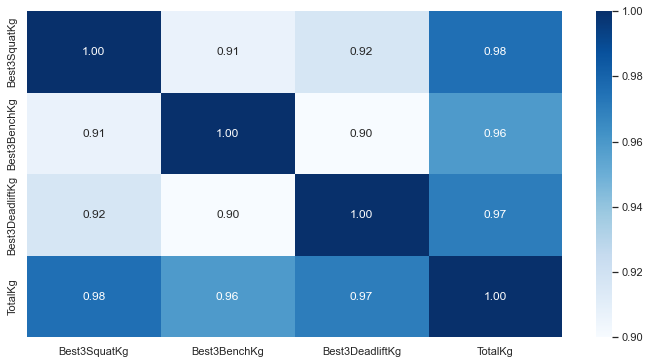

In [34]:
#Let's increase the contrast by reducing vmin
f = plt.figure(figsize = (12, 6))
sb.heatmap(sbdBestSuccess_df.corr(), vmin = 0.9, vmax = 1, annot = True, fmt = ".2f", cmap="Blues")

### Observations

**Primary muscle groups used in Squats, Bench and Deadlifts**
- Squats: glutes, hip flexors, and quadriceps (mostly lower body)
- Bench: pecs, shoulders, and triceps (mostly upper body)
- Deadlifts:  glutes, hamstrings, hips, back, core, trapezius (equal distribution)

**Between Squats, Bench and Deadlifts**
- Correlation between all 3 exercises are very high.
- There is highest correlation between Best Deadlift score and Best Squat score. This could be due to the similarity between muscle groups and part of body used in both exercises.

**Between 3 exercises and TotalKg**
- Correlation between the 3 exercises and TotalKg are extremely similar, with Squats having the highest correlation and Bench the lowest with TotalKg.
- The variation in correlation is extremely low.

### Possible Hunch

**Improving performance**

It is suggested that a powerlifter could work more on Squats to improve their overall score. However, the correlation between all 3 exercises and between the exercises and total score is so high and similar that there is negligible advantage in working specially on any of them. 

A powerlifter could work on any exercise to improve the other 2 as these are all Compound Exercises which use multiple muscle groups and involve almost the entire body, simply varying in primary muscle groups used. 

**Explaining correlation**

Even though correlation between **Squats and Bench** is high and **Deadlifts and Bench** is high, Squats and Deadlifts have no similarity in primary muscle groups used with Bench. We can consider other factors that are involved in a Bench Press motion that improve its score as well. 

The Bench Press motion involves driving one's leg into the ground to support lifting the bar off one's chest, also known as Leg Drive. The correlation between Bench score and the other scores supports the argument that Leg Drive is an essential factor in Bench Press. 

The function of Leg Drive defines the succcess of a Bench Press. Therefore, working on Squats and Deadlifts (which heavily use legs) improves the Best Bench score.

## Exploring cross-catergory variables used for Ranking 

In [35]:
compare_df = numeric_df[['Wilks', 'Glossbrenner', 'Goodlift']]
compare_df.describe()

,Wilks,Glossbrenner,Goodlift
count,2775.000000,2775.000000,2773.000000
mean,346.214937,323.902822,64.162380
std,82.314126,82.167457,15.814134
min,111.060000,99.210000,18.570000
25%,289.155000,264.590000,53.170000
50%,345.830000,324.880000,64.520000
75%,398.590000,377.830000,75.220000
max,704.440000,672.820000,121.050000


<AxesSubplot:>

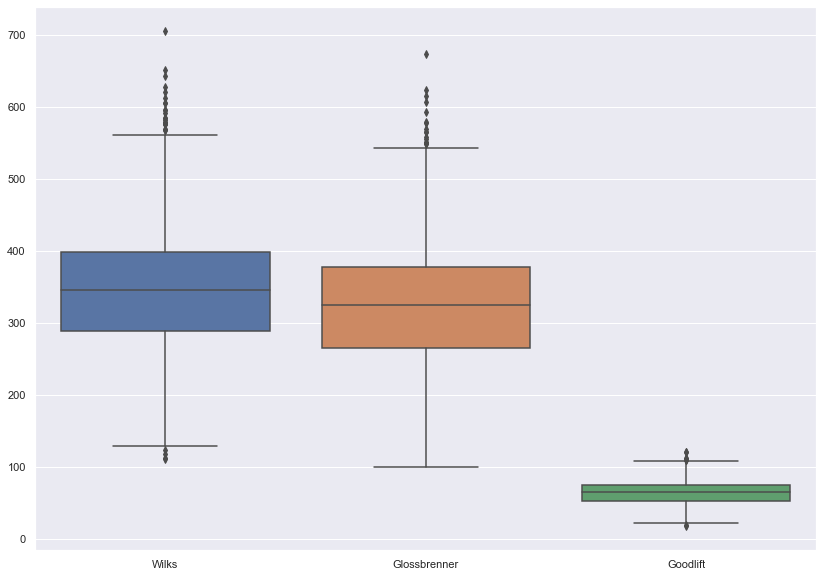

In [36]:
f = plt.subplots(figsize = (14,10))
sb.boxplot(data=compare_df)

In [37]:
compareandWeight_df = numeric_df[['Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg', 
                               'TotalKg', 'Wilks', 'Glossbrenner', 'Goodlift', 'BodyweightKg']]

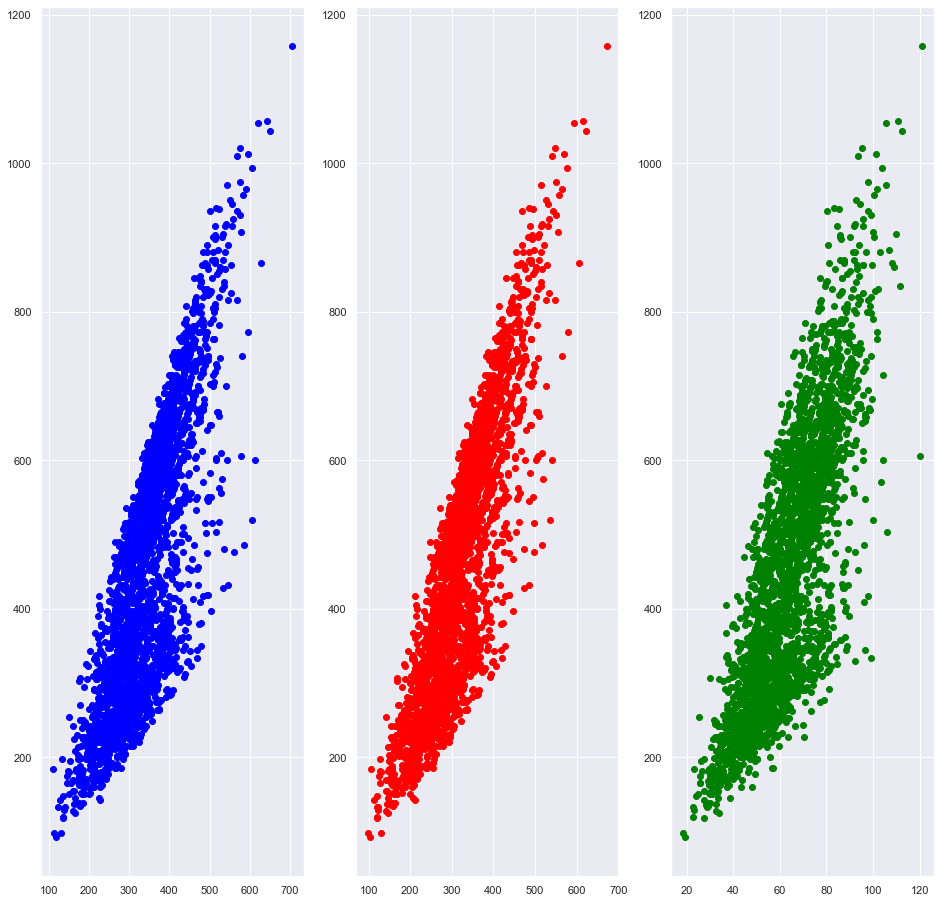

In [38]:
#Compare totalkg with cross-category points system variables ('Wilks', 'Glossbrenner', 'Goodlift')

f, axes = plt.subplots(1, 3, figsize =(16,16))

axes[0].scatter(x = 'Wilks', y = 'TotalKg', data = compareandWeight_df, color = 'blue')
axes[1].scatter(x = 'Glossbrenner', y = 'TotalKg', data = compareandWeight_df, color = 'red')
axes[2].scatter(x = 'Goodlift', y = 'TotalKg', data = compareandWeight_df, color = 'green')

<AxesSubplot:>

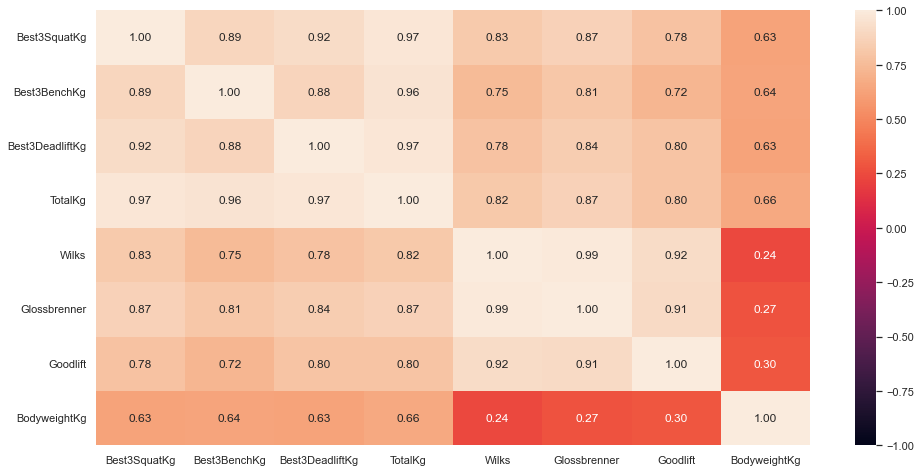

In [39]:
f = plt.figure(figsize = (16, 8))
sb.heatmap(compareandWeight_df.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

<AxesSubplot:>

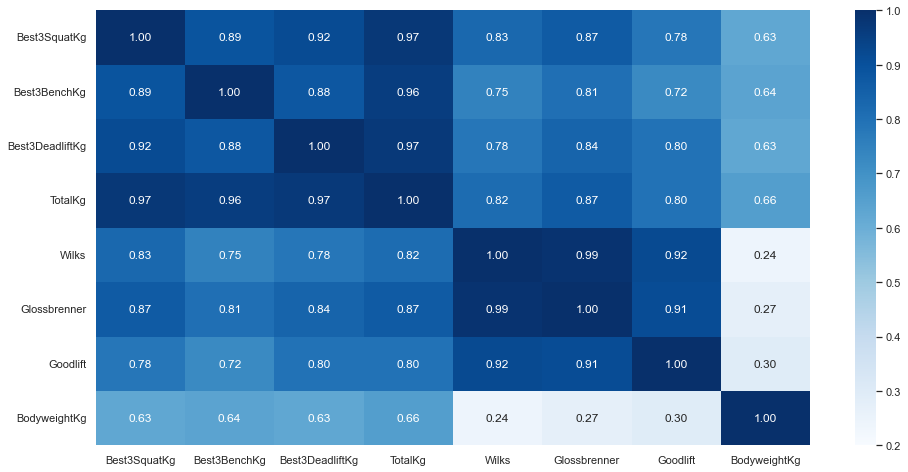

In [40]:
#Let's increase the contrast by reducing vmin
f = plt.figure(figsize = (16, 8))
sb.heatmap(compareandWeight_df.corr(), vmin = 0.2, vmax = 1, annot = True, fmt = ".2f", cmap="Blues")

In [41]:
def variance(data): 
    n = len(data)
    mean = sum(data) / n
    deviations = [(x - mean) ** 2 for x in data]
    variance = sum(deviations) / n
    return variance

In [42]:
#Let's find out the biases of Wilks, Glossbrenner and Goodlift

#Required datapoints
wilks_squats = compareandWeight_df['Wilks'].corr(compareandWeight_df['Best3SquatKg'])
wilks_bench = compareandWeight_df['Wilks'].corr(compareandWeight_df['Best3BenchKg'])
wilks_dl = compareandWeight_df['Wilks'].corr(compareandWeight_df['Best3DeadliftKg'])

gb_squats = compareandWeight_df['Glossbrenner'].corr(compareandWeight_df['Best3SquatKg'])
gb_bench = compareandWeight_df['Glossbrenner'].corr(compareandWeight_df['Best3BenchKg'])
gb_dl = compareandWeight_df['Glossbrenner'].corr(compareandWeight_df['Best3DeadliftKg'])

gl_squats = compareandWeight_df['Goodlift'].corr(compareandWeight_df['Best3SquatKg'])
gl_bench = compareandWeight_df['Goodlift'].corr(compareandWeight_df['Best3BenchKg'])
gl_dl = compareandWeight_df['Goodlift'].corr(compareandWeight_df['Best3DeadliftKg'])

In [43]:
#Finding their variance
wilks_v = variance([wilks_squats, wilks_bench, wilks_dl])
gb_v = variance([gb_squats, gb_bench, gb_dl])
gl_v = variance([gl_squats, gl_bench, gl_dl])

print("Variance of correlation between exercises and\n")
print("Wilks \t\t", wilks_v)
print("Glossbrenner \t", gb_v)
print("Goodlift \t", gl_v)

Variance of correlation between exercises and

Wilks 		 0.001042704046136835
Glossbrenner 	 0.0006190630026296496
Goodlift 	 0.0009858887504204013


### Observations
**Between Wilks, Glossbrenner and Goodlift**
- There is very high correlation between all 3 variables.
- Wilks, Glossbrenner, Goodlift are probably not percentages as their maximums are >100.

- Correlation between Wilks and Glossbrenner is extremely high (almost perfect, close to 1).
- Wilks and Glossbrenner are similar in range, IQR, maximum , minimum and mean, with Glossbrenner values being lower overall.

**Between Wilks, Glossbrenner, Goodlift and TotalKg**
- All cross-categorical variables have high correlation with TotalKg, with TotalKg influencing Glossbrenner the most and Goodlift the least.

**Between Wilks, Glossbrenner, Goodlift and exercises**
- The variance of correlation between Wilks, Glossbrenner, Goodlift and exercises is highest for Wilks and lowest for Glossbrenner.
- The exercise that has highest correlation with Wilks is Squats.

### Possible Hunches
**Wilks, Glossbrenner, Goodlift and TotalKg**
- Cross-categorical variables (Wilks, Glossbrenner and Goodlift) consider TotalKg as well as other factors like bodyweight. The more influence TotalKg has on these variables, the more dependent the variable scores are on TotalKg alone, the less other factors such as bodyweight are considered. This may suggest less fairness across weightclass in the Wilks and Glossbrenner scorings.

**Wilks, Glossbrenner, Goodlift and exercises**
- Obervations suggest that Wilks is the most biased when calculating its score. It is biased towards Squats.
- It seems that Glossbrenner has the least bias, considering all 3 exercises most equally.

## Exploring variables against time (years)

In [44]:
againsttimedraft_df = train_df[['BodyweightKg', 'Best3SquatKg','Best3BenchKg', 'Best3DeadliftKg', 
                           'TotalKg', 'Wilks', 'Glossbrenner', 'Goodlift', 'Date']]

In [45]:
againsttime_df['Years'] = againsttimedraft_df['Date'].str[-4:]

NameError: name 'againsttime_df' is not defined

In [ ]:
againsttime_df['Years'] = againsttime_df['Years'].astype(int)
againsttime_df.head()

,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Wilks,Glossbrenner,Goodlift,Date,Years
Years,,,,,,,,,,
1965,56.0,127.69,93.44,168.28,389.41,354.50,347.57,66.27,4/9/1965,2019
1974,71.7,130.00,100.00,220.00,450.00,331.19,320.62,67.16,21/12/1974,2009
1975,75.0,174.63,138.35,219.99,532.97,379.77,366.95,77.70,18/4/1975,2009
1975,68.8,120.00,75.00,160.00,355.00,269.61,261.48,54.14,18/1/1975,2009
1976,NaN,401.43,251.74,390.09,1043.26,NaN,NaN,NaN,14/8/1976,2018


In [ ]:
#let us only consider non-failed attempts for the 3 exercises

againsttime_df = againsttime_df[(againsttime_df['Best3SquatKg'] >= 0) 
                                  & (againsttime_df['Best3BenchKg'] >= 0)
                                 & (againsttime_df['Best3DeadliftKg'] >= 0)]

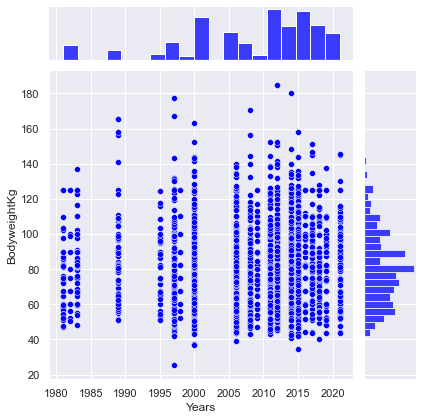

In [ ]:
sb.jointplot(y = 'BodyweightKg', x = 'Years', data = againsttime_df, color = 'blue', height= 6)


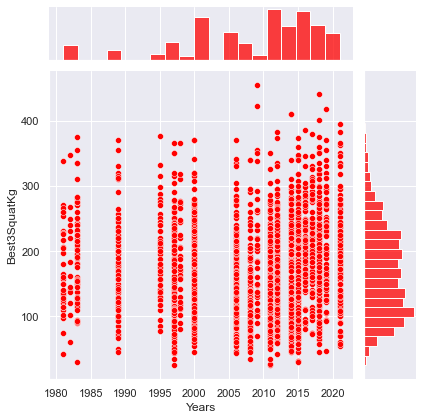

In [ ]:
sb.jointplot(y = 'Best3SquatKg', x = 'Years', data = againsttime_df, color = 'red', height= 6)


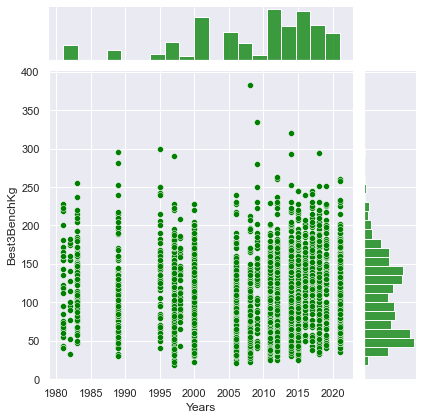

In [ ]:
sb.jointplot(y = 'Best3BenchKg', x = 'Years', data = againsttime_df, color = 'green', height= 6)


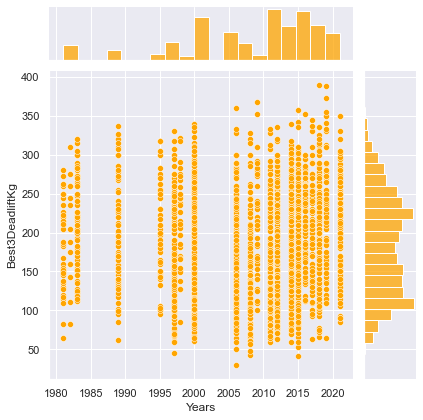

In [ ]:
sb.jointplot(y = 'Best3DeadliftKg', x = 'Years', data = againsttime_df, color = 'orange', height= 6)

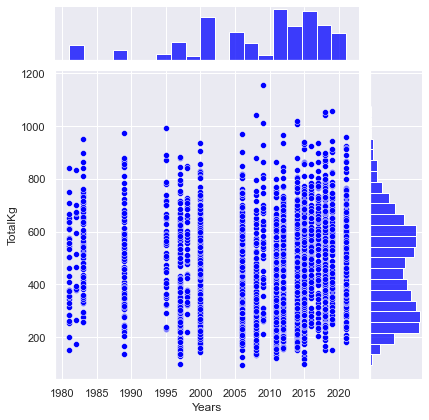

In [ ]:
sb.jointplot(y = 'TotalKg', x = 'Years', data = againsttime_df, color = 'blue', height= 6)

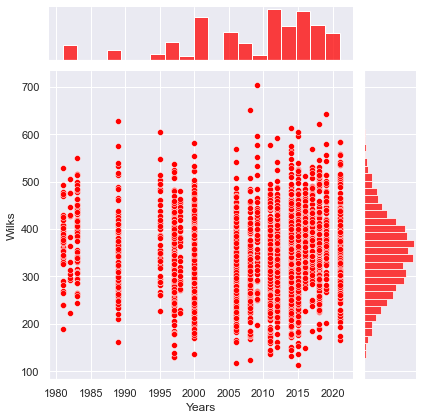

In [ ]:
sb.jointplot(y = 'Wilks', x = 'Years', data = againsttime_df, color = 'red', height= 6)


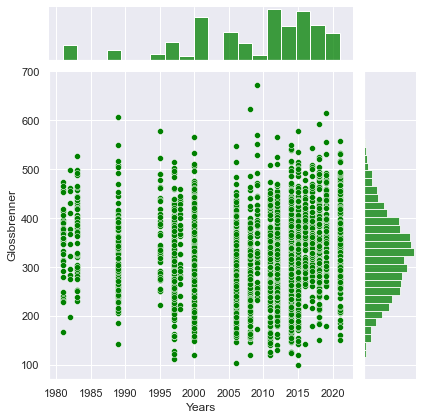

In [ ]:
sb.jointplot(y = 'Glossbrenner', x = 'Years', data = againsttime_df, color = 'green', height= 6)


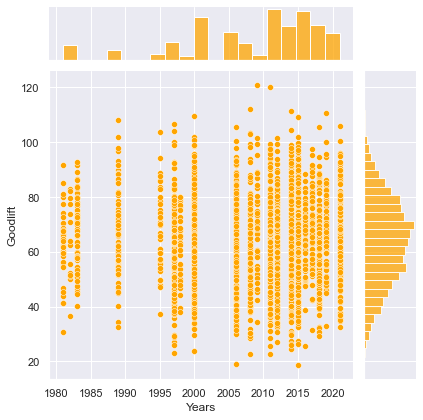

In [ ]:
sb.jointplot(y = 'Goodlift', x = 'Years', data = againsttime_df, color = 'orange', height= 6)

### Observations
- There is no significant trend along the years.

# Data Preprocessing
---

# Removing disqualified lifters
---

Information in the `Place` column allows us to know if certain lifters were disqualified from the competition.

Values are as follows:

- Positive number: the place the lifter came in.
- G: Guest lifter. The lifter succeeded, but wasn't eligible for awards.
- DQ: Disqualified. Note that DQ could be for procedural reasons, not just failed attempts.
- DD: Doping Disqualification. The lifter failed a drug test.
- NS: No-Show. The lifter did not show up on the meet day.


We would want to remove disqualified lifters, as they may negatively impact the outcome of the predictions.

In [47]:
train_df['Place'].unique()

array(['1', '3', 'DQ', '7', '9', '2', '4', '6', 'NS', '5', '14', '11',
       '10', '8', '13', '12', '18', '15', '22', '24', '32', '26', '17',
       '19', '16', 'G', '28', 'DD', '23', '51', '21', '84', '20', '29'],
      dtype=object)

In [48]:
df = train_df.drop(train_df[
    (train_df.Place == 'DQ') |
    (train_df.Place == 'NS') |
    (train_df.Place == 'DD')
].index)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2814 entries, 0 to 2999
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              2814 non-null   object 
 1   Sex               2814 non-null   object 
 2   Event             2814 non-null   object 
 3   Equipment         2814 non-null   object 
 4   Age               1613 non-null   float64
 5   AgeClass          1884 non-null   object 
 6   BirthYearClass    1721 non-null   object 
 7   Division          2812 non-null   object 
 8   BodyweightKg      2775 non-null   float64
 9   WeightClassKg     2788 non-null   object 
 10  Squat1Kg          1284 non-null   float64
 11  Squat2Kg          1270 non-null   float64
 12  Squat3Kg          1230 non-null   float64
 13  Squat4Kg          11 non-null     float64
 14  Best3SquatKg      2787 non-null   float64
 15  Bench1Kg          1285 non-null   float64
 16  Bench2Kg          1277 non-null   float64


After dropping disqualified and no-show lifters from the dataset, we are left with only 2814 values from the original 3000 values in the train dataset. 

# Processing Best lifts
---
The best attempts for a lifters Bench Press, Squat and Deadlift are recorded in `Best3BenchKg`, `Best3SquatKg` and `Best3DeadliftKg` respectively. These values will then be used to calculate `TotalKg`.

Some lifters are missing data for the individual exercises. We will attempt to see if we can salvage the missing data from the individual attempts, otherwise they will be removed from the train set. 

First, remove the entries with missing data for all 3 attempts and the Best3 columns (i.e. completely no data at all for any of the lifts).

In [50]:
df = df.drop(df[
    (df.Best3BenchKg.isna()) &
    (df.Bench1Kg.isna()) &
    (df.Bench2Kg.isna()) &
    (df.Bench3Kg.isna()) &
    (df.Best3SquatKg.isna()) &
    (df.Squat1Kg.isna()) &
    (df.Squat2Kg.isna()) &
    (df.Squat3Kg.isna()) &
    (df.Best3DeadliftKg.isna()) &
    (df.Deadlift1Kg.isna()) &
    (df.Deadlift2Kg.isna()) &
    (df.Deadlift3Kg.isna())
    
].index)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2787 entries, 0 to 2999
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              2787 non-null   object 
 1   Sex               2787 non-null   object 
 2   Event             2787 non-null   object 
 3   Equipment         2787 non-null   object 
 4   Age               1611 non-null   float64
 5   AgeClass          1876 non-null   object 
 6   BirthYearClass    1714 non-null   object 
 7   Division          2785 non-null   object 
 8   BodyweightKg      2749 non-null   float64
 9   WeightClassKg     2761 non-null   object 
 10  Squat1Kg          1284 non-null   float64
 11  Squat2Kg          1270 non-null   float64
 12  Squat3Kg          1230 non-null   float64
 13  Squat4Kg          11 non-null     float64
 14  Best3SquatKg      2787 non-null   float64
 15  Bench1Kg          1285 non-null   float64
 16  Bench2Kg          1277 non-null   float64


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2787 entries, 0 to 2999
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              2787 non-null   object 
 1   Sex               2787 non-null   object 
 2   Event             2787 non-null   object 
 3   Equipment         2787 non-null   object 
 4   Age               1611 non-null   float64
 5   AgeClass          1876 non-null   object 
 6   BirthYearClass    1714 non-null   object 
 7   Division          2785 non-null   object 
 8   BodyweightKg      2749 non-null   float64
 9   WeightClassKg     2761 non-null   object 
 10  Squat1Kg          1284 non-null   float64
 11  Squat2Kg          1270 non-null   float64
 12  Squat3Kg          1230 non-null   float64
 13  Squat4Kg          11 non-null     float64
 14  Best3SquatKg      2787 non-null   float64
 15  Bench1Kg          1285 non-null   float64
 16  Bench2Kg          1277 non-null   float64


We are now left with 2787 entries. Out of the 2787 entries, there is one missing value for `Best3DeadliftKg` and one missing value for `Best3BenchKg`. 

In [53]:
df[df.Best3BenchKg.isna() | df.Best3BenchKg.isna()]

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
2209,Stuart Fredieu,M,SBD,Raw,34.5,24-34,24-39,MR-O,101.7,105,...,Yes,USA,LA,USAPL,IPF,6/5/2017,USA,LA,NaN,LA State Games


From the cell above, we can tell that one lifter is missing both values. Otherwise, it would have returned two rows.

In [54]:
df.loc[2209]

Name                Stuart Fredieu
Sex                              M
Event                          SBD
Equipment                      Raw
Age                           34.5
AgeClass                     24-34
BirthYearClass               24-39
Division                      MR-O
BodyweightKg                 101.7
WeightClassKg                  105
Squat1Kg                     183.7
Squat2Kg                    -192.8
Squat3Kg                    -192.8
Squat4Kg                       NaN
Best3SquatKg                 183.7
Bench1Kg                    -138.4
Bench2Kg                       NaN
Bench3Kg                       NaN
Bench4Kg                       NaN
Best3BenchKg                   NaN
Deadlift1Kg                 -229.1
Deadlift2Kg                    NaN
Deadlift3Kg                    NaN
Deadlift4Kg                    NaN
Best3DeadliftKg                NaN
TotalKg                      183.7
Place                            2
Dots                        112.26
Wilks               

This lifter appears to have failed 2 squat attempts, and all his bench and deadlift attempts. We can safely drop this lifter from the train set.

In [55]:
df.drop(index=2209, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2786 entries, 0 to 2999
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              2786 non-null   object 
 1   Sex               2786 non-null   object 
 2   Event             2786 non-null   object 
 3   Equipment         2786 non-null   object 
 4   Age               1610 non-null   float64
 5   AgeClass          1875 non-null   object 
 6   BirthYearClass    1713 non-null   object 
 7   Division          2784 non-null   object 
 8   BodyweightKg      2748 non-null   float64
 9   WeightClassKg     2760 non-null   object 
 10  Squat1Kg          1283 non-null   float64
 11  Squat2Kg          1269 non-null   float64
 12  Squat3Kg          1229 non-null   float64
 13  Squat4Kg          11 non-null     float64
 14  Best3SquatKg      2786 non-null   float64
 15  Bench1Kg          1284 non-null   float64
 16  Bench2Kg          1277 non-null   float64


# Filling Missing `Age` Values
---

## Using `AgeClass`

First, use the `AgeClass` column to fill in missing values for `Age` column. 

There are a variety of possible AgeClasses that a lifter can fall into, described in https://gitlab.com/openpowerlifting/opl-data/blob/main/modules/opltypes/src/ageclass.rs 

There is an AgeClass named *5-Dec*, which does not provide much information about the ages of the lifters from the name alone. 

However, the *5-Dec* class has only one lifter with a missing `Age` value. We can use the median age of those in the *5-Dec* class to fill this one missing value.

In [56]:
df['AgeClass'].unique()

array(['60-64', nan, '20-23', '55-59', '13-15', '16-17', '24-34', '45-49',
       '70-74', '18-19', '40-44', '35-39', '50-54', '5-Dec', '65-69',
       '80-999', '75-79'], dtype=object)

In [57]:
## 5-Dec AgeClass, with only one missing Age Value
df[df.AgeClass == '5-Dec']

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
307,Davis Lee,M,SBD,Raw,11.0,5-Dec,NaN,Youth 10-11,65.54,67.5,...,Yes,USA,PA,ADAU,NaN,11/11/2012,USA,PA,Bigler,Central PA Open
327,Brady Dibble,M,SBD,Raw,9.5,5-Dec,NaN,MR-Y2,36.60,40,...,Yes,USA,WY,USAPL,IPF,2/2/2019,USA,LA,NaN,Youth Nationals
350,Addyson Navarro,F,SBD,Raw,10.0,5-Dec,NaN,FR-Y2,34.80,35,...,Yes,USA,AZ,USAPL,IPF,23/9/2018,USA,AZ,NaN,Apeman Strong Fest 2.0
411,Casey Walker #1,M,SBD,Raw,10.0,5-Dec,NaN,Youth 11 & Under,41.96,48,...,Yes,USA,PA,RAW,NaN,7/12/2014,USA,PA,Clearfield,Central PA Open
1499,T. McIntosh,M,SBD,Single-ply,NaN,5-Dec,NaN,Open,105.00,105,...,NaN,NaN,NaN,USPF,IPF,23/4/1983,USA,IN,West Lafayette,Indiana State Natural
1608,Ferrell,M,SBD,Wraps,11.5,5-Dec,NaN,Nov-13,82.50,82.5,...,Yes,NaN,NaN,WNPF,NaN,17/6/2000,USA,MD,Baltimore,Teen Junior Submaster & Master Nationals & Ame...
1683,Brian Foster,M,SBD,Single-ply,4.5,5-Dec,NaN,Open,90.00,90,...,Yes,NaN,NaN,ADFPA,NaN,20/11/1983,USA,NJ,West Orange,New Jersey State Drug Free
1928,Hannah Johnson #3,F,SBD,Raw,11.5,5-Dec,NaN,FR-Y3,57.56,63,...,Yes,USA,LA,USAPL,IPF,1/12/2018,USA,LA,NaN,Shreveport Showdown
2215,Rayder Knaack,M,SBD,Raw,10.5,5-Dec,NaN,MR-Y2,46.75,48,...,Yes,USA,OH,USAPL,NaN,15/1/2022,USA,OH,NaN,New Year Open


In [58]:
## find the median age of the 5-Dec AgeClass
df[df.AgeClass == '5-Dec']['Age'].median()

10.25

In [59]:
df.loc[df.AgeClass=='5-Dec', 'Age'] = df.loc[df.AgeClass=='5-Dec', 'Age'].fillna(10.5)
## StackOverflow magic https://stackoverflow.com/questions/49963491/fillna-by-selected-rows-in-pandas-dataframe 


In [60]:
df[df.AgeClass == '5-Dec']

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
307,Davis Lee,M,SBD,Raw,11.0,5-Dec,NaN,Youth 10-11,65.54,67.5,...,Yes,USA,PA,ADAU,NaN,11/11/2012,USA,PA,Bigler,Central PA Open
327,Brady Dibble,M,SBD,Raw,9.5,5-Dec,NaN,MR-Y2,36.60,40,...,Yes,USA,WY,USAPL,IPF,2/2/2019,USA,LA,NaN,Youth Nationals
350,Addyson Navarro,F,SBD,Raw,10.0,5-Dec,NaN,FR-Y2,34.80,35,...,Yes,USA,AZ,USAPL,IPF,23/9/2018,USA,AZ,NaN,Apeman Strong Fest 2.0
411,Casey Walker #1,M,SBD,Raw,10.0,5-Dec,NaN,Youth 11 & Under,41.96,48,...,Yes,USA,PA,RAW,NaN,7/12/2014,USA,PA,Clearfield,Central PA Open
1499,T. McIntosh,M,SBD,Single-ply,10.5,5-Dec,NaN,Open,105.00,105,...,NaN,NaN,NaN,USPF,IPF,23/4/1983,USA,IN,West Lafayette,Indiana State Natural
1608,Ferrell,M,SBD,Wraps,11.5,5-Dec,NaN,Nov-13,82.50,82.5,...,Yes,NaN,NaN,WNPF,NaN,17/6/2000,USA,MD,Baltimore,Teen Junior Submaster & Master Nationals & Ame...
1683,Brian Foster,M,SBD,Single-ply,4.5,5-Dec,NaN,Open,90.00,90,...,Yes,NaN,NaN,ADFPA,NaN,20/11/1983,USA,NJ,West Orange,New Jersey State Drug Free
1928,Hannah Johnson #3,F,SBD,Raw,11.5,5-Dec,NaN,FR-Y3,57.56,63,...,Yes,USA,LA,USAPL,IPF,1/12/2018,USA,LA,NaN,Shreveport Showdown
2215,Rayder Knaack,M,SBD,Raw,10.5,5-Dec,NaN,MR-Y2,46.75,48,...,Yes,USA,OH,USAPL,NaN,15/1/2022,USA,OH,NaN,New Year Open


The `Age` value has been successfully filled. We used a value of 10.5 as required by the definition of the `Age` feature in the documentation.

https://openpowerlifting.gitlab.io/opl-csv/bulk-csv-docs.html


Other points to note about the `AgeClass` column:

-   The largest class consists of lifters 80 years old and above, but the class is named *80-999*. 
-   The smallest class consists of lifters aged *5-12*.  

For simplicity, we will assume that the lifter's age is the midpoint of the boundary defined by the AgeClass.

We will assume that the maximum age for the *80-999* class is 99 years.

In [61]:
df[df['Age'].isna() & df['AgeClass'].notna()]

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
31,Monique Avalos,F,SBD,Single-ply,NaN,16-17,NaN,Girls,55.34,56,...,Yes,NaN,NaN,THSWPA,NaN,20/2/2016,USA,TX,Seguin Texas,Seguin Matador Meet
43,Acasia Martinez,F,SBD,Single-ply,NaN,16-17,NaN,Girls,55.16,56,...,Yes,NaN,NaN,THSWPA,NaN,18/2/2017,USA,TX,Altair Rice,Rice Consolidated Saturday Meet
61,Jamie Comer,F,SBD,Single-ply,NaN,18-19,NaN,Girls,85.18,90,...,Yes,NaN,NaN,THSWPA,NaN,17/2/2018,USA,TX,Normangee,Normangee Powerlifting Meet
74,Brooke Daniel,F,SBD,Single-ply,NaN,18-19,NaN,Girls,51.26,51.9,...,Yes,NaN,NaN,THSWPA,NaN,26/2/2019,USA,TX,GHS Indoor,Region 6 Div 2 Championship
99,Essance Porter,F,SBD,Single-ply,NaN,18-19,NaN,Girls,86.73,90,...,Yes,NaN,NaN,THSWPA,NaN,21/1/2017,USA,TX,Moody,10th Annual Moody Invitational
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2954,Ruby Hernandez,F,SBD,Single-ply,NaN,16-17,14-18,Girls,95.53,100,...,Yes,NaN,NaN,THSWPA,NaN,3/3/2015,USA,TX,Gatesville,Reg 2 Div 3 Championship
2955,Kayla Anderson #3,F,SBD,Single-ply,NaN,18-19,NaN,Girls,93.71,100,...,Yes,NaN,NaN,THSWPA,NaN,24/1/2019,USA,TX,Henderson,Lion Invitational
2977,Thomas Waal,M,SBD,Raw,NaN,24-34,NaN,Open,82.15,83,...,Yes,NaN,NaN,NSF,IPF,16/12/2017,Norway,NaN,Skien,Åpent stevne
2980,Miranda Ovalle,F,SBD,Single-ply,NaN,18-19,NaN,Girls,66.98,67.3,...,Yes,NaN,NaN,THSWPA,NaN,14/2/2019,USA,TX,TSS Gym,TSS-UTSA Invitational 6


In [62]:
## First, fill the values using the AgeClass Strings
df['Age'].fillna(df.AgeClass, inplace=True)

In [63]:
df['Age'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2786 entries, 0 to 2999
Series name: Age
Non-Null Count  Dtype 
--------------  ----- 
1875 non-null   object
dtypes: object(1)
memory usage: 43.5+ KB


The `Age` column now contains both float64 (original age data) and strings (filled in by `AgeClass`). We will now use a function to process the strings and extract the midpoint of the respective `AgeClass` boundary.

In [64]:
def StringProcess(g):
    ## Function that returns the midpoint of an AgeClass 
    if type(g) == str:
        low = high = ""
        for x in range(len(g)):
            if g[x] == '-':
                high += g[x+1]
                high += g[x+2]
                break
            low += g[x]
        return (float(low)+float(high)) / 2
    return g ## if the value was not a string (i.e a float), leave it as it is

In [65]:
## Use the newString function to replace the Strings with the maximum age 
df['Age'] = df['Age'].apply(StringProcess)

In [66]:
## cell for checking
df.loc[2981]

Name                      J. Ashworth
Sex                                 M
Event                             SBD
Equipment                  Single-ply
Age                              37.0
AgeClass                        35-39
BirthYearClass                    NaN
Division             Submasters 35-39
BodyweightKg                      NaN
WeightClassKg                    125+
Squat1Kg                          NaN
Squat2Kg                          NaN
Squat3Kg                          NaN
Squat4Kg                          NaN
Best3SquatKg                    237.5
Bench1Kg                          NaN
Bench2Kg                          NaN
Bench3Kg                          NaN
Bench4Kg                          NaN
Best3BenchKg                    145.0
Deadlift1Kg                       NaN
Deadlift2Kg                       NaN
Deadlift3Kg                       NaN
Deadlift4Kg                       NaN
Best3DeadliftKg                 242.5
TotalKg                         625.0
Place       

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2786 entries, 0 to 2999
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              2786 non-null   object 
 1   Sex               2786 non-null   object 
 2   Event             2786 non-null   object 
 3   Equipment         2786 non-null   object 
 4   Age               1875 non-null   float64
 5   AgeClass          1875 non-null   object 
 6   BirthYearClass    1713 non-null   object 
 7   Division          2784 non-null   object 
 8   BodyweightKg      2748 non-null   float64
 9   WeightClassKg     2760 non-null   object 
 10  Squat1Kg          1283 non-null   float64
 11  Squat2Kg          1269 non-null   float64
 12  Squat3Kg          1229 non-null   float64
 13  Squat4Kg          11 non-null     float64
 14  Best3SquatKg      2786 non-null   float64
 15  Bench1Kg          1284 non-null   float64
 16  Bench2Kg          1277 non-null   float64


## Using `BirthYearClass`


Now the age column only contains numeric float64 datatypes, which shows that we have successfully replaced all the strings after the fillna() operation.

However, there are still some missing values, where both `Age` and `AgeClass` data was missing.

We can fill the remaining missing values for `Age` using the `BirthYearClass` information.


Information about `BirthYearClass`: 

     The ages in the range are the oldest possible ages for the lifter that year. For example, 40-49 means "the year the lifter turns 40 through the full year in which the lifter turns 49."

     BirthYearClass is used primarily by the IPF and by IPF affiliates. Non-IPF federations tend to use AgeClass instead.

     The full range available to BirthYearClass is defined by modules/opltypes/src/birthyearclass.rs. 

We will also use the midpoint of the range defined in `BirthYearClass` to fill out the missing `Age` values. This method is similar to the approach used with `AgeClass`.

In [68]:
df[df['Age'].isna() & df['BirthYearClass'].notna()]

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
40,Ioan Ordean,M,SBD,Single-ply,NaN,NaN,19-23,Junior I,122.50,120+,...,Yes,NaN,NaN,FRPL,IPF,1/6/2013,Romania,NaN,NaN,Campionatul National de Powerlifting Juniori s...
54,John Mitchell #7,M,SBD,Raw,NaN,NaN,50-59,M-C-M2,99.50,100,...,Yes,England,WM,BP,IPF,4/9/2010,England,NaN,Birmingham,British Unequipped Championship
197,Jim Starr,M,SBD,Single-ply,NaN,NaN,40-49,Open,NaN,125+,...,NaN,NaN,NaN,USPF,IPF,7/11/1981,USA,TX,Houston,Edward S. Hudson Memorial
214,Sangwon Jo,M,SBD,Raw,NaN,NaN,19-23,Juniors,72.00,74,...,Yes,Canada,BC,CPU,IPF,13/4/2019,Canada,BC,Richmond,Silverback Blitz
217,Steinar Fredheim,M,SBD,Single-ply,NaN,NaN,40-49,Masters 40-49,75.00,75,...,Yes,Norway,NaN,NSF,IPF,21/2/2004,Norway,NaN,Sande,Veteran NM
335,Clive Madge,M,SBD,Raw,NaN,NaN,40-49,Masters 1,102.50,105,...,Yes,NaN,NaN,NZPF,IPF,11/4/2015,New Zealand,HKB,Hastings,Central Districts Regional Championships
568,Kevin Bolen,M,SBD,Single-ply,NaN,NaN,50-59,M-M2,75.00,75,...,Yes,NaN,NaN,USAPL,IPF,11/12/2004,USA,MO,St Louis,Rivers Edge PL & BP
699,Travis Pardue,M,SBD,Single-ply,NaN,NaN,40-49,M-M1a,82.00,82.5,...,Yes,USA,NaN,USAPL,IPF,29/4/2011,USA,GA,Atlanta,Masters Nationals
731,Frank Harrison,M,SBD,Single-ply,NaN,NaN,60-69,Masters 3,88.70,90,...,Yes,Canada,BC,CPU,IPF,31/1/2010,Canada,BC,Vancouver,BC Winter Open
733,Silje Kristine Günther,F,SBD,Raw,NaN,NaN,19-23,Juniors 19-23,67.70,69,...,Yes,NaN,NaN,NSF,IPF,22/1/2022,Norway,NaN,Moss,Åpent stevne


In [69]:
df['BirthYearClass'].unique()

array(['60-69', nan, '50-59', '14-18', '24-39', '40-49', '70-999',
       '19-23'], dtype=object)

In [70]:
## First, fill the values using the AgeClass Strings
df['Age'].fillna(df.BirthYearClass, inplace=True)

In [71]:
## Use the newString function to replace the Strings with the midpoint 
df['Age'] = df['Age'].apply(StringProcess)

In [72]:
## cell for checking
df.loc[2993]

Name                Lily Riggs
Sex                          F
Event                      SBD
Equipment                  Raw
Age                       21.0
AgeClass                   NaN
BirthYearClass           19-23
Division               Juniors
BodyweightKg             69.15
WeightClassKg               72
Squat1Kg                 135.0
Squat2Kg                 142.5
Squat3Kg                -145.0
Squat4Kg                   NaN
Best3SquatKg             142.5
Bench1Kg                  72.5
Bench2Kg                 -77.5
Bench3Kg                  77.5
Bench4Kg                   NaN
Best3BenchKg              77.5
Deadlift1Kg              160.0
Deadlift2Kg              165.0
Deadlift3Kg              170.0
Deadlift4Kg                NaN
Best3DeadliftKg          170.0
TotalKg                  390.0
Place                        2
Dots                    397.11
Wilks                   391.29
Glossbrenner            345.01
Goodlift                  80.7
Tested                     Yes
Country 

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2786 entries, 0 to 2999
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              2786 non-null   object 
 1   Sex               2786 non-null   object 
 2   Event             2786 non-null   object 
 3   Equipment         2786 non-null   object 
 4   Age               1932 non-null   float64
 5   AgeClass          1875 non-null   object 
 6   BirthYearClass    1713 non-null   object 
 7   Division          2784 non-null   object 
 8   BodyweightKg      2748 non-null   float64
 9   WeightClassKg     2760 non-null   object 
 10  Squat1Kg          1283 non-null   float64
 11  Squat2Kg          1269 non-null   float64
 12  Squat3Kg          1229 non-null   float64
 13  Squat4Kg          11 non-null     float64
 14  Best3SquatKg      2786 non-null   float64
 15  Bench1Kg          1284 non-null   float64
 16  Bench2Kg          1277 non-null   float64


## Using `MeetName` to fill `Age`

Every entry has a `MeetName`. We can use the median age of the lifters at the particular event to fill in the remaining missing values for `Age`. 

In [74]:
df[df['Age'].isna()]

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
1,Mohamed Reda,M,SBD,Raw,NaN,NaN,NaN,Open,99.58,105,...,Yes,Egypt,NaN,AfricanPF,IPF,20/10/2018,Morocco,NaN,Meknes,African & Arab Powerlifting Championships
3,Edie Montalvo,F,SBD,Single-ply,NaN,NaN,NaN,Girls,71.12,75,...,Yes,NaN,NaN,THSWPA,NaN,10/2/2018,USA,TX,Weslaco,Weslaco Girls Invitational Powerlifting Meet
4,Faith Bailey,F,SBD,Single-ply,NaN,NaN,NaN,Girls,78.83,82.3,...,Yes,NaN,NaN,THSWPA,NaN,7/3/2020,USA,TX,Bay City,Region 4 Division 3 Meet
5,Flippie Pretorius,M,SBD,Single-ply,NaN,NaN,NaN,Open,88.25,90,...,Yes,South Africa,FS,SAPF,IPF,7/8/2010,South Africa,NaN,NaN,South African Inter-Provincial Powerlifting Ch...
6,Mia Gonzalez,F,SBD,Single-ply,NaN,NaN,NaN,Girls,74.30,75,...,Yes,NaN,NaN,THSWPA,NaN,6/3/2021,USA,TX,Bert Ogden Arena,Region V Division I Championships
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2976,Newsome,M,SBD,Single-ply,NaN,NaN,NaN,Open,67.50,67.5,...,NaN,NaN,NaN,SCI,NaN,14/11/1998,USA,PA,Somerset,South Central Regional
2979,Jim Probst,M,SBD,Single-ply,NaN,NaN,NaN,Open,82.50,82.5,...,NaN,NaN,NaN,USPF,IPF,10/2/1980,USA,KS,Leavenworth,Missouri Valley Championships
2982,J. Vinig,M,SBD,Single-ply,NaN,NaN,NaN,M-O,90.00,90,...,Yes,NaN,NaN,USAPL,IPF,20/9/2003,USA,TX,Killeen,Lifetime Drug Free Nationals
2983,Brian Davis,M,SBD,Single-ply,NaN,NaN,NaN,fs,79.61,85,...,Yes,USA,MO,NASA,NaN,11/4/1997,USA,TX,Garland,High School Nationals


In [75]:
df.groupby(by=["MeetName"]).median()['Age']


MeetName
10th Annual Moody Invitational                                         18.50
10th Annual Ryan Moore New England States High School Championships    16.50
10th Annual Wildcat Powerlifting Meet                                    NaN
12th Annual American Open Championships                                22.00
12th Annual Moody Invitational                                           NaN
                                                                       ...  
Zvenigorod Powerlifting Championships                                  23.50
Åbne Thy                                                               19.00
Åländska mästerskap i klassisk styrkelyft                              24.50
Åpent stevne                                                           28.75
Österreichische Meisterschaft Jugend/Junioren und AK1-4                39.50
Name: Age, Length: 1893, dtype: float64

In [76]:
df['Age'] = df['Age'].fillna(df.groupby('MeetName')['Age'].transform('median'))

##stackoverflow magic https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2786 entries, 0 to 2999
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              2786 non-null   object 
 1   Sex               2786 non-null   object 
 2   Event             2786 non-null   object 
 3   Equipment         2786 non-null   object 
 4   Age               2154 non-null   float64
 5   AgeClass          1875 non-null   object 
 6   BirthYearClass    1713 non-null   object 
 7   Division          2784 non-null   object 
 8   BodyweightKg      2748 non-null   float64
 9   WeightClassKg     2760 non-null   object 
 10  Squat1Kg          1283 non-null   float64
 11  Squat2Kg          1269 non-null   float64
 12  Squat3Kg          1229 non-null   float64
 13  Squat4Kg          11 non-null     float64
 14  Best3SquatKg      2786 non-null   float64
 15  Bench1Kg          1284 non-null   float64
 16  Bench2Kg          1277 non-null   float64


In [78]:
#### need to think of a way to process the remaining null values for age, or should we just drop them entirely

## Rounding off `Age` values 

From the documentation (https://openpowerlifting.gitlab.io/opl-csv/bulk-csv-docs.html): 

          Ages can be one of two types: exact or approximate. 
          Exact ages are given as integer numbers, for example 23. 
          
          Approximate ages are given as an integer plus 0.5, for example 23.5.
          A lifter with the given age 23.5 could be either 23 or 24 -- 
          we don't have enough information to know.

Given that the median values we have used to fill the data could be out of the defined values for age (e.g. 17.75), it would help for us to round off all the Age values to the nearest whole number

In [79]:
df['Age'] = df['Age'].apply(lambda x: round(x, 0))

In [80]:
df['Age'].unique()

array([61., nan, 18., 23., 58., 14., 29., 16., 25., 34., 46., 73., 60.,
       41., 28., 27., 30., 21., 42., 22., 45., 39., 31., 54., 20., 32.,
       33., 40., 36., 24., 37., 26., 17., 38., 50., 19., 44., 59., 62.,
       57., 47., 52., 43., 56., 11., 10., 53., 15., 51., 55., 12., 35.,
       68., 13., 64., 49., 65., 72., 66., 80., 70., 48., 75.,  4., 67.,
       71., 74.])

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2786 entries, 0 to 2999
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              2786 non-null   object 
 1   Sex               2786 non-null   object 
 2   Event             2786 non-null   object 
 3   Equipment         2786 non-null   object 
 4   Age               2154 non-null   float64
 5   AgeClass          1875 non-null   object 
 6   BirthYearClass    1713 non-null   object 
 7   Division          2784 non-null   object 
 8   BodyweightKg      2748 non-null   float64
 9   WeightClassKg     2760 non-null   object 
 10  Squat1Kg          1283 non-null   float64
 11  Squat2Kg          1269 non-null   float64
 12  Squat3Kg          1229 non-null   float64
 13  Squat4Kg          11 non-null     float64
 14  Best3SquatKg      2786 non-null   float64
 15  Bench1Kg          1284 non-null   float64
 16  Bench2Kg          1277 non-null   float64


# Filling Missing Values (`BodyweightKg`)

---

## Using `WeightClassKg` to fill `BodyWeightKg`

From the documentation:

    Weight classes can be specified as a maximum or as a minimum. 
    Maximums are specified by just the number, for example `90` means "up to (and including) 90kg." 
    Minimums are specified by a `+` to the right of the number, for example `90+` means "above (and excluding) 90kg."


In [82]:
df[df.BodyweightKg.isna()]

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
123,Robert Dempsey #1,M,SBD,Single-ply,30.0,24-34,24-39,Open,NaN,125+,...,Yes,USA,NaN,ADFPA,NaN,6/12/1987,USA,CT,Westhaven,Miller North Americans
197,Jim Starr,M,SBD,Single-ply,44.0,NaN,40-49,Open,NaN,125+,...,NaN,NaN,NaN,USPF,IPF,7/11/1981,USA,TX,Houston,Edward S. Hudson Memorial
210,DJ Jenkins,M,SBD,Single-ply,44.0,NaN,NaN,M-O,NaN,125+,...,Yes,NaN,NaN,USAPL,IPF,25/8/2001,USA,VA,Charlottesville,Lifetime Drug Free Nationals
231,Jim Parry,M,SBD,Single-ply,NaN,NaN,NaN,M-LT,NaN,90+,...,Yes,NaN,NaN,USAPL,IPF,9/11/2002,USA,NJ,Rockaway,New Jersey State
233,C. Thomas,M,SBD,Single-ply,14.0,13-15,NaN,Junior High,NaN,NaN,...,NaN,USA,NaN,USA-UA,NaN,2/8/1980,USA,CO,Longmont,Longs Peak Open Football Strength Check
255,Flores,M,SBD,Single-ply,NaN,NaN,NaN,Open,NaN,NaN,...,NaN,NaN,NaN,SCI,NaN,24/2/1985,USA,NY,Beacon,Schwartz Meet
289,L. Clever,F,SBD,Single-ply,NaN,NaN,NaN,F-O,NaN,90+,...,Yes,NaN,NaN,ADFPA,NaN,10/6/1995,USA,ID,Salmon,Rocky Mountain States
298,S. McClanahan,F,SBD,Single-ply,NaN,NaN,NaN,Masters,NaN,80+,...,Yes,NaN,NaN,ADFPA,NaN,11/4/1987,USA,CA,Fremont,California Championships
379,Stephanie Ricafrente,F,SBD,Single-ply,14.0,NaN,NaN,Teen 17-19,NaN,80+,...,Yes,NaN,NaN,ADFPA,NaN,6/4/1991,USA,IL,Chicago,Womens Nationals
726,P. Crisan,F,SBD,Single-ply,NaN,NaN,NaN,Open,NaN,NaN,...,NaN,NaN,NaN,USPF,IPF,27/3/1982,USA,IN,New Albany,Central USA Championships


First, fill the missing `BodyWeightKg` values with the corresponding strings in `WeightClassKg`. 

Then, slice the strings to obtain the minimum weight in the particular weight class.

In [83]:
df['BodyweightKg'].fillna(df.WeightClassKg, inplace=True)

In [84]:
df['BodyweightKg'] = df['BodyweightKg'].apply(lambda f: float(f[:-1]) if type(f) == str else f)

In [85]:
df.Division.value_counts()

Open                 759
Girls                442
MR-O                 127
Juniors              112
FR-O                  70
                    ... 
U16                    1
F_OCR_BPU              1
13-16                  1
Pro Masters 50-54      1
fs                     1
Name: Division, Length: 382, dtype: int64

In [86]:
df[df.BodyweightKg.isna()]

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
233,C. Thomas,M,SBD,Single-ply,14.0,13-15,NaN,Junior High,NaN,NaN,...,NaN,USA,NaN,USA-UA,NaN,2/8/1980,USA,CO,Longmont,Longs Peak Open Football Strength Check
255,Flores,M,SBD,Single-ply,NaN,NaN,NaN,Open,NaN,NaN,...,NaN,NaN,NaN,SCI,NaN,24/2/1985,USA,NY,Beacon,Schwartz Meet
726,P. Crisan,F,SBD,Single-ply,NaN,NaN,NaN,Open,NaN,NaN,...,NaN,NaN,NaN,USPF,IPF,27/3/1982,USA,IN,New Albany,Central USA Championships
1217,Martin Webb,M,SBD,Single-ply,NaN,NaN,NaN,M-E-Open,NaN,NaN,...,Yes,UK,NaN,BAWLA,IPF,27/10/1984,England,NaN,NaN,Terry Morris Club v Sittingbourne Club Powerli...
1609,Deborah Lindsay,F,SBD,Single-ply,NaN,NaN,NaN,Open,NaN,NaN,...,NaN,NaN,NaN,USPF,IPF,29/9/1984,USA,UT,Ogden,Rocky Mountain Open
1715,Regina Curtis,F,SBD,Single-ply,NaN,NaN,NaN,Open,NaN,NaN,...,NaN,NaN,NaN,USPF,IPF,15/12/1984,USA,WV,Weirton,Steel Valley Open
2157,Mary Higgs,F,SBD,Single-ply,NaN,NaN,NaN,Open,NaN,NaN,...,NaN,NaN,NaN,USPF,IPF,14/5/1983,USA,FL,St. Petersburg,St. Petersburg Championships
2392,Todd Mealy,M,SBD,Raw,NaN,NaN,NaN,MW,NaN,NaN,...,NaN,NaN,NaN,IPA,NaN,13/4/2003,USA,PA,Leesport,Power Palooza 5
2474,Rick Rooker,M,SBD,Single-ply,16.0,NaN,NaN,Masters,NaN,NaN,...,NaN,NaN,NaN,USPF,IPF,12/1/1985,USA,FL,Tallahassee,State Meet
2737,J. Mazzola,F,SBD,Single-ply,NaN,NaN,NaN,Open,NaN,NaN,...,NaN,NaN,NaN,USPF,IPF,4/10/1981,USA,NJ,Plainfield,New Jersey AAU District Championships


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2786 entries, 0 to 2999
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              2786 non-null   object 
 1   Sex               2786 non-null   object 
 2   Event             2786 non-null   object 
 3   Equipment         2786 non-null   object 
 4   Age               2154 non-null   float64
 5   AgeClass          1875 non-null   object 
 6   BirthYearClass    1713 non-null   object 
 7   Division          2784 non-null   object 
 8   BodyweightKg      2775 non-null   float64
 9   WeightClassKg     2760 non-null   object 
 10  Squat1Kg          1283 non-null   float64
 11  Squat2Kg          1269 non-null   float64
 12  Squat3Kg          1229 non-null   float64
 13  Squat4Kg          11 non-null     float64
 14  Best3SquatKg      2786 non-null   float64
 15  Bench1Kg          1284 non-null   float64
 16  Bench2Kg          1277 non-null   float64


# K means Clustering 
---

## Finding optimal number of clusters $k$

## Elbow method 

The elbow method takes into account the average distance of a particular datapoint to the centroid of the cluster. 

We want to find the number of clusters $k$ that minimises the distance from datapoints to the centroid, producing the most compact cluster.

By plotting $k$ against the average distance, we are able to find the $k$ that produces the most significant drop in average distance and hence this is the most optimum $k$

## Silhouette score 

For a datapoint $i$, Silhouette coefficient $S(i)$ measures how similar $i$ is to other datapoints of the same cluster, versus how similar $i$ is to datapoints of different clusters.

## $S(i)$ = $\frac{b(i)-a(i)}{\text{max( }a(i)\text{, }b(i)\text{ )}}$

- $a(i)$ = average distance of $i$ to points in the same cluster.
- $b(i)$ = average distance of $i$ to points in the next nearest cluster.

Values of $S(i)$ lie between -1 to 1. 

- Value of 1 indicates that the datapoints are far away from other clusters. This means that the clusters formed are generally distinct.
- Value of 0 indicates that the datapoints are close to the boundaries of two different clusters. This means that there may be overlapping clusters.
- Value of -1 means that the datapoints are assigned to the wrong cluster.

We will aim to use both methods to identify the optimum $k$.

Utility functions are defined below.



In [137]:
####### POINT FOR DISCUSSION ##########
''' Because the magnitude of TotalKg is in the hundreds (3-digit integers) but BodyWeight 
and TotalKg is in double-digits, this could affect the distance between the datapoints and clusters
resulting in skewed S(i) values and a overall decreasing Silhouette score graph. 
One solution is to normalise the data using StandardScaler, but that would make it harder to visualise the 
data when printing out. 
Another solution is to divide TotalKg by 10 i.e. 400kg is scaled to a magnitude of 40.
'''


' Because the magnitude of TotalKg is in the hundreds (3-digit integers) but BodyWeight \nand TotalKg is in double-digits, this could affect the distance between the datapoints and clusters\nresulting in skewed S(i) values and a overall decreasing Silhouette score graph. \nOne solution is to normalise the data using StandardScaler, but that would make it harder to visualise the \ndata when printing out. \nAnother solution is to divide TotalKg by 10 i.e. 400kg is scaled to a magnitude of 40.\n'

In [88]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [114]:
## function that aims to find the optimal number of clusters in range of 1 to max_clusters
## a graph of inertia against number of clusters is plotted so the elbow method can be used
## a graph of the silhouette score is plotted against the number of clusters
def optimal_clusters(max_clusters: int, data:pd.DataFrame):
    inertia = []
    sil_scores = []
    for i in range(1, max_clusters+1):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
        cluster_labels = kmeans.labels_
        if(i>1): ##minimum number of clusters needed to calculate silhouette score is 2
            sil_scores.append(silhouette_score(data, cluster_labels))

    ##plot the Inertia against number of clusters
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,12))
    ax1.set_title("Inertia against clusters (Elbow method)")
    ax1.plot(range(1, max_clusters+1), inertia)
    ax1.set_xlabel("Num of Clusters")
    ax1.set_ylabel("Inertia")

    ##plot the silhouette score 
    ax2.plot(range(2,max_clusters+1), sil_scores)
    ax2.set_title("Silhouette score against clusters")
    ax2.set_xlabel("Num of Clusters")
    ax2.set_ylabel("Silhouette Score")

    plt.tight_layout()
    

In [115]:
## function that fits a kmeans model with the train data and optimal number of clusters,
## and returns a DataFrame with the clusters appended to the train data.
## If verbose is true, the function also prints out the data of the respective clusters

def KMeans_model_fitting(optimal_clusters: int, data: pd.DataFrame, features: list, verbose: bool) -> pd.DataFrame:
    kmeans = KMeans(n_clusters=optimal_clusters)
    kmeans.fit(data[features])
    labels = kmeans.predict(data[features])
    data_copy = data.copy()
    data_copy["Cluster"] = pd.Categorical(labels)
    
    if verbose==True:
        print("Features", end='\t')
        for feature in features: ## printing the headers
            print(feature, end="\t")
        print()
        
        for i, centroid in enumerate(kmeans.cluster_centers_): ##printing the centroid data
            print("Cluster", i, end=":\t")
            for coord in centroid:
                print(round(coord,2), end='\t')
            print()
        print()

        print("Inertia: ", kmeans.inertia_)

        sb.catplot(y="Cluster", data=data_copy, kind = 'count')
    
    return data_copy

    

In [116]:
## function that extracts features from the original dataset, and removes all null values
## filters the data by Sex, and returns two dataframes in the order: males, females

def extract_clean_filter(original_data, features: list):
    model_data = original_data[features]
    model_data.dropna(axis=0, inplace=True)
    male_index = model_data[model_data.Sex == 'M'].index
    female_index = model_data[model_data.Sex == 'F'].index

    female_model_data = model_data.drop(male_index, axis=0)
    male_model_data = model_data.drop(female_index, axis=0)

    return male_model_data, female_model_data

In [117]:
## function that plots the distribution of Divisions in a given dataset

def Division_visuals(df, printDict: bool):
    fig, ax = plt.subplots(df.Cluster.nunique(), figsize = (12, 45))
    for cluster in df.Cluster.unique():
        cluster_df = df[df.Cluster == cluster]
        cluster_dict = cluster_df.Division.value_counts().to_dict()
        trimmed_dict = {}
        for (key, value) in cluster_dict.items():
            if value>=10:
                trimmed_dict[key] = value ##only consider divisions with 10 contestants or more
        if printDict:
            print("Cluster ", cluster, ":\n\t", trimmed_dict)
            print()    
        ax[cluster].bar(list(trimmed_dict.keys()), list(trimmed_dict.values()), width=0.4)
        ax[cluster].set_title(f"Cluster {cluster}")
    
    plt.tight_layout()

## Bivariate Exploration

We will first look at the features `TotalKg` and `BodyweightKg` against `Age` to identify patterns in the weights lifted and the bodyweight of the lifters respectively. This will be filtered by gender (`Sex` column).

We will then observe the distribution of the `Division` in each cluster. 

If a large proportion of lifters in a particular cluster belong to a certain `Division`, we can conclude that the `Division` is dominated by lifters of a particular `Age`, `BodyweightKg` or `TotalKg`. 

Otherwise, we can conclude that these features are not strongly correlated with the lifter's `Division`. 

## Exploring `TotalKg` and `Age` (males)

In [118]:
male_model_data, female_model_data = extract_clean_filter(df, ["TotalKg", "Age", "Sex", "Division"])

/var/folders/dz/456j1vhd5lj65z33cq93dr7m0000gn/T/ipykernel_67279/1176011492.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data.dropna(axis=0, inplace=True)


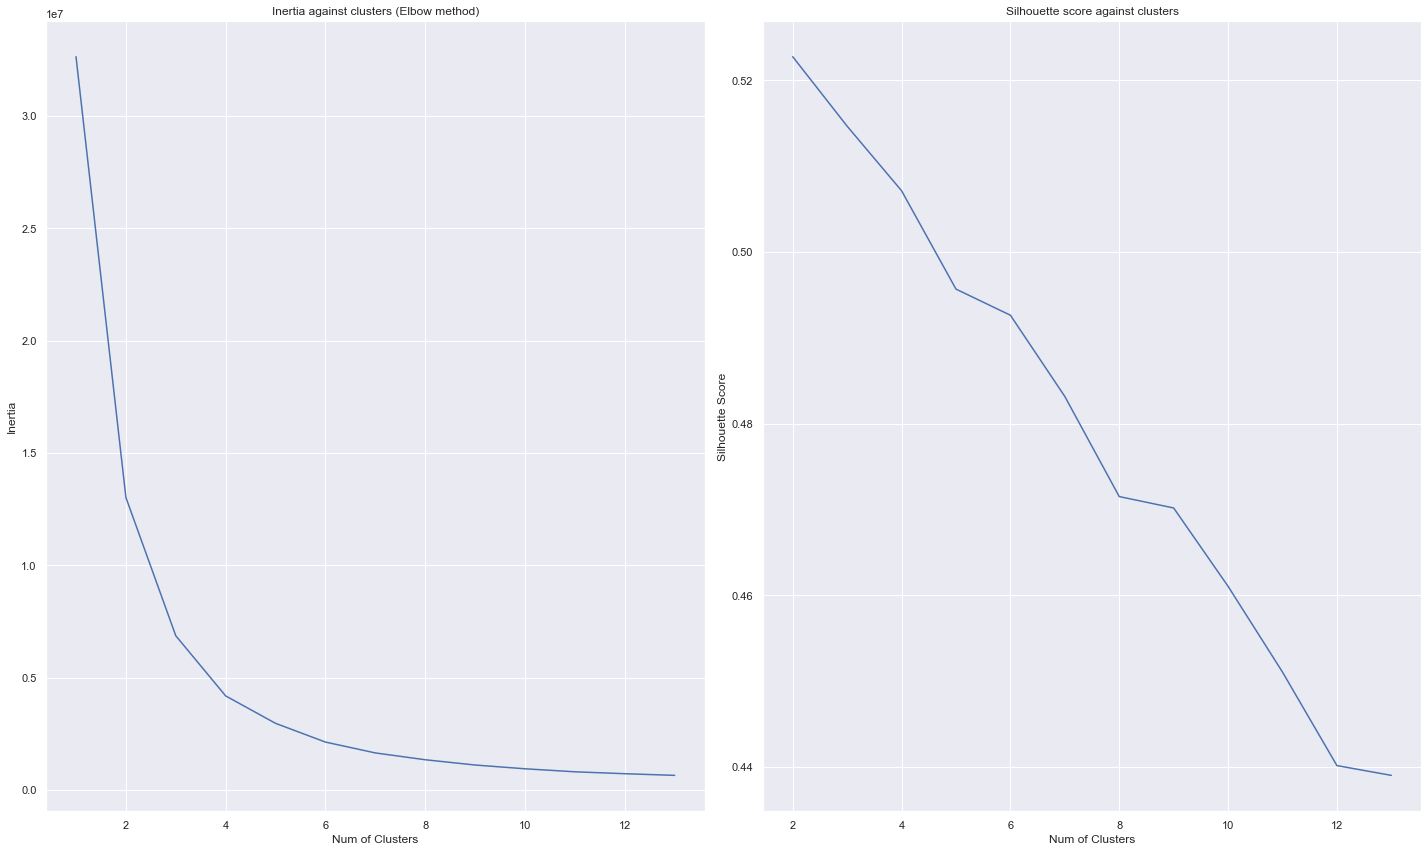

In [119]:
## Explore males first
optimal_clusters(13, male_model_data[["TotalKg", "Age"]])

Features	TotalKg	Age	
Cluster 0:	605.43	29.31	
Cluster 1:	269.27	22.66	
Cluster 2:	876.97	30.26	
Cluster 3:	507.71	28.79	
Cluster 4:	712.3	31.27	
Cluster 5:	401.51	26.38	

Inertia:  2129419.1329025067


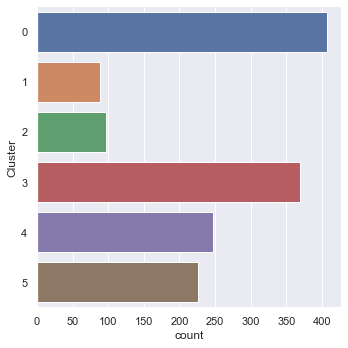

In [120]:
## from the above results, optimal number of clusters = 6

male_model_copy = KMeans_model_fitting(6, male_model_data, ["TotalKg", "Age"], True)

In [121]:
male_model_copy.Cluster.nunique()

6

Cluster  4 :
	 {'Open': 91, 'MR-O': 19, 'Juniors': 14}

Cluster  3 :
	 {'Open': 81, 'MR-O': 43, 'Juniors': 29, 'Masters 2': 11, 'Sub-Juniors': 11}

Cluster  1 :
	 {}

Cluster  2 :
	 {'Open': 48}

Cluster  5 :
	 {'Open': 40, 'Juniors': 16, 'Sub-Juniors': 16}

Cluster  0 :
	 {'Open': 128, 'MR-O': 47, 'Juniors': 20, 'MR-Jr': 13, 'Masters 1': 10}



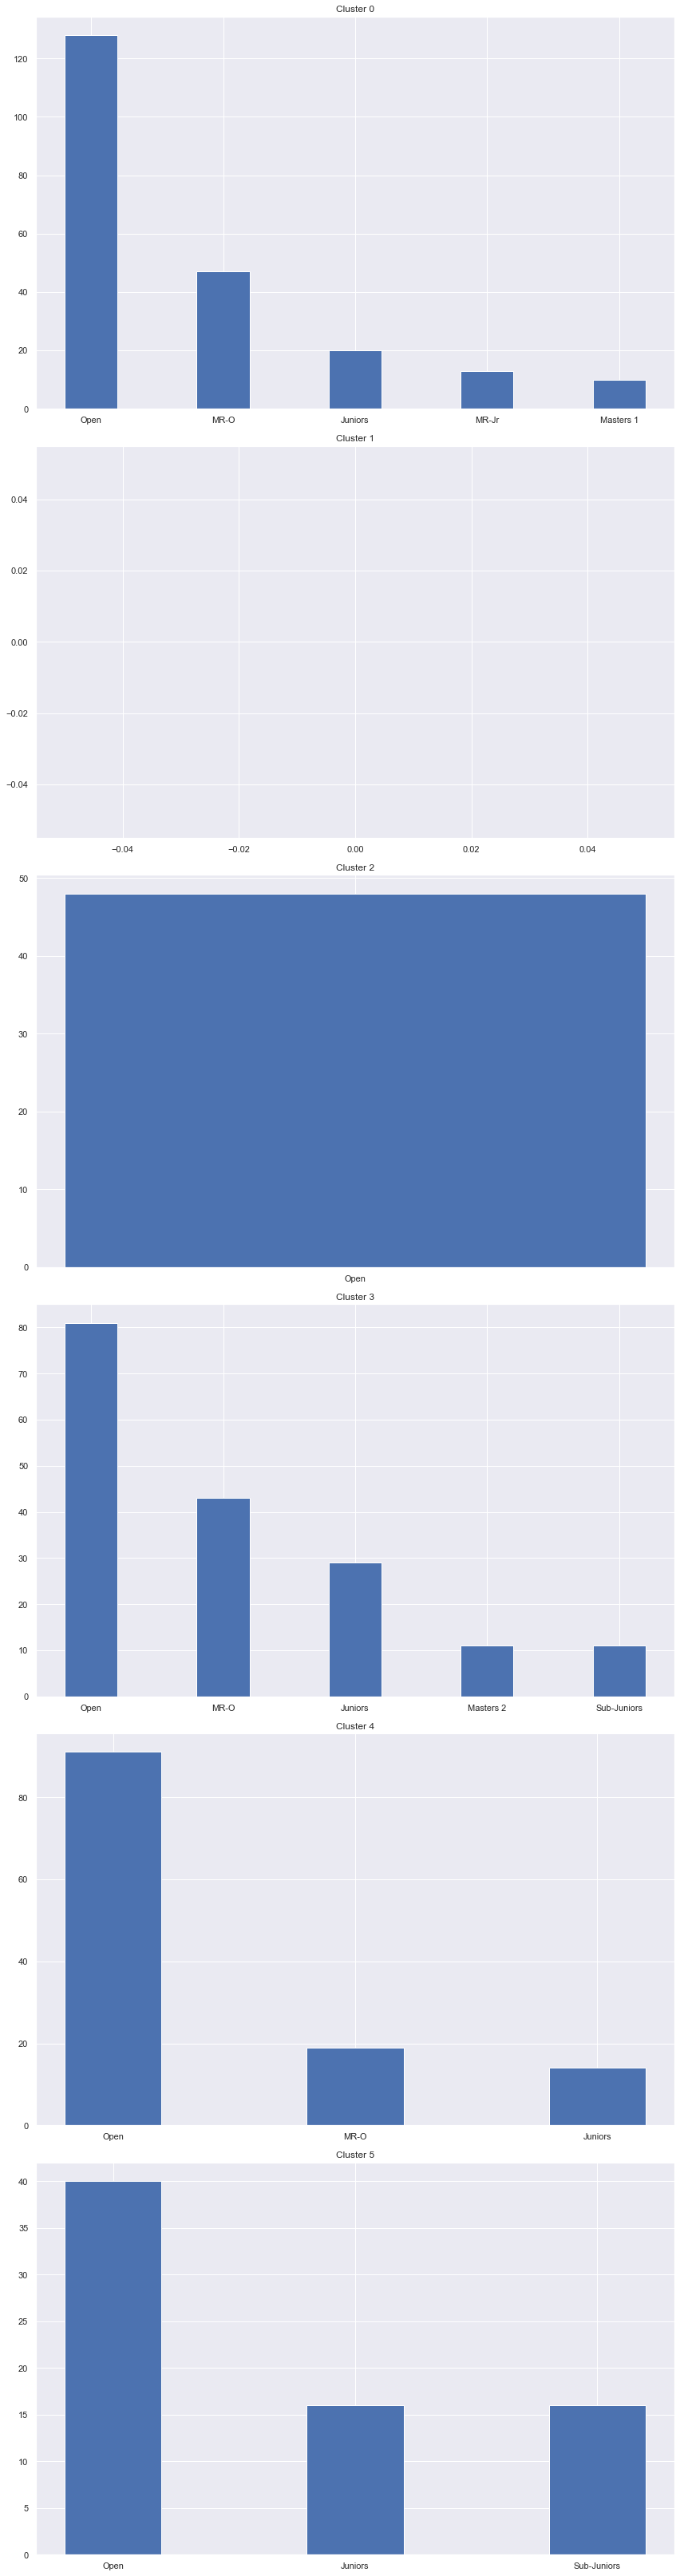

In [122]:
Division_visuals(male_model_copy, True)

In [124]:
## interpretations here, can repeat the process
#  for females by using female_model_data and repeating the steps above

## Exploring `BodyweightKg` and `Age` (males)

In [125]:
male_model_data, female_model_data = extract_clean_filter(df, ["BodyweightKg", "Age", "Sex", "Division"])

/var/folders/dz/456j1vhd5lj65z33cq93dr7m0000gn/T/ipykernel_67279/1176011492.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data.dropna(axis=0, inplace=True)


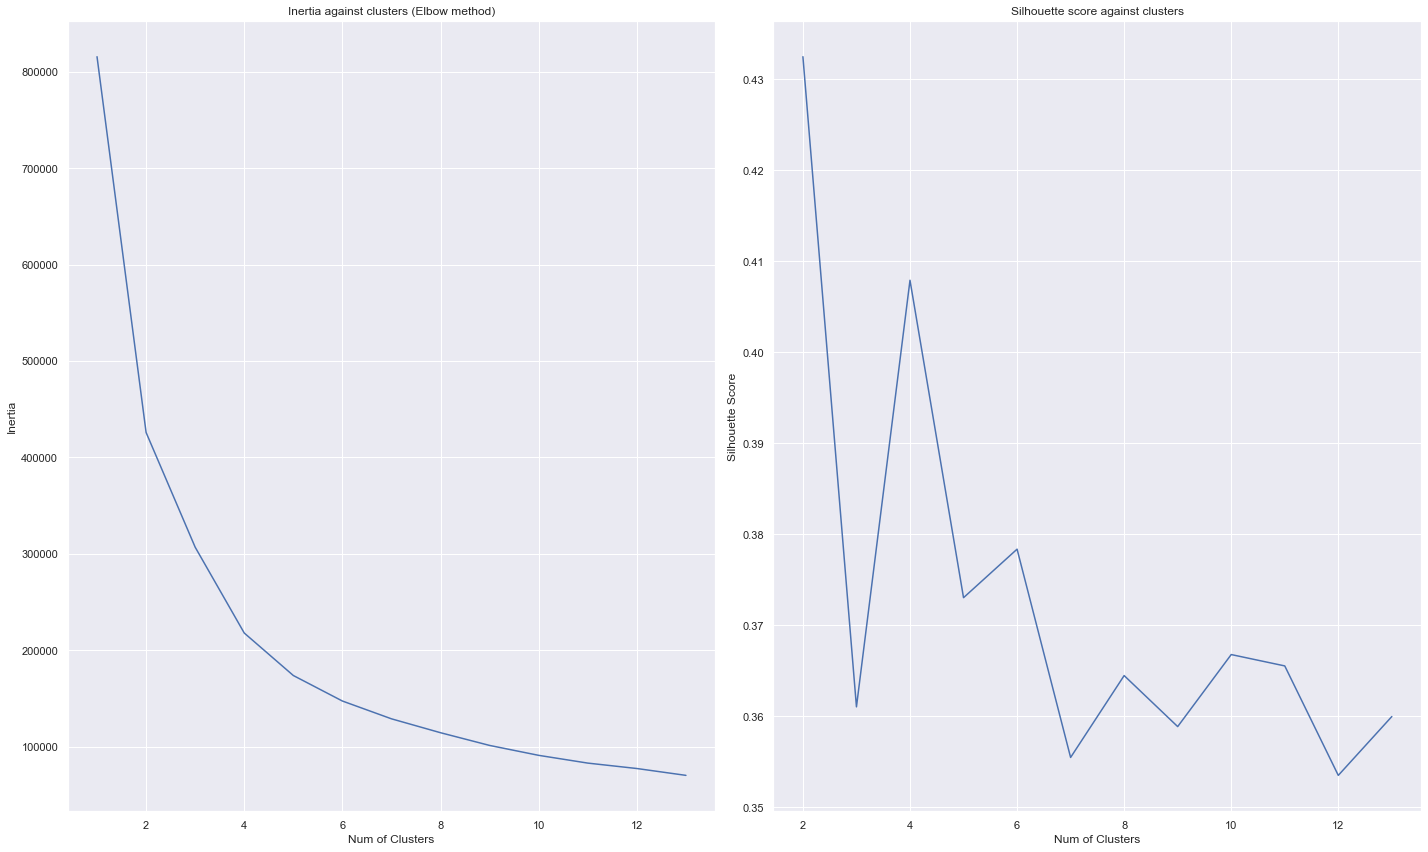

In [126]:
optimal_clusters(13, male_model_data[["BodyweightKg", "Age"]])

Features	BodyweightKg	Age	
Cluster 0:	87.58	48.65	
Cluster 1:	71.37	21.26	
Cluster 2:	124.9	34.22	
Cluster 3:	96.61	24.94	

Inertia:  217768.77958667127


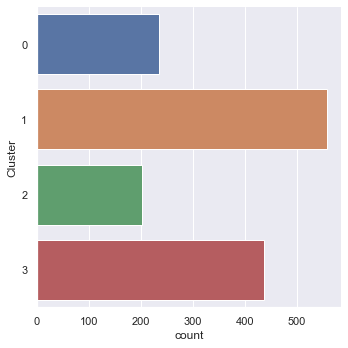

In [127]:
## from the above, optimal number of clusters = 4

male_model_copy = KMeans_model_fitting(4, male_model_data, ["BodyweightKg", "Age"], verbose=True)

Cluster  3 :
	 {'Open': 146, 'MR-O': 60, 'Juniors': 30, 'MR-Jr': 14, 'M-O': 10}

Cluster  0 :
	 {'Open': 36, 'Masters 2': 17, 'Masters 1': 14}

Cluster  1 :
	 {'Open': 156, 'Juniors': 49, 'MR-O': 43, 'Sub-Juniors': 31, 'MR-Jr': 15, 'Pro Open': 11, 'MR-T2': 11, 'MR-T3': 10}

Cluster  2 :
	 {'Open': 56, 'MR-O': 16}



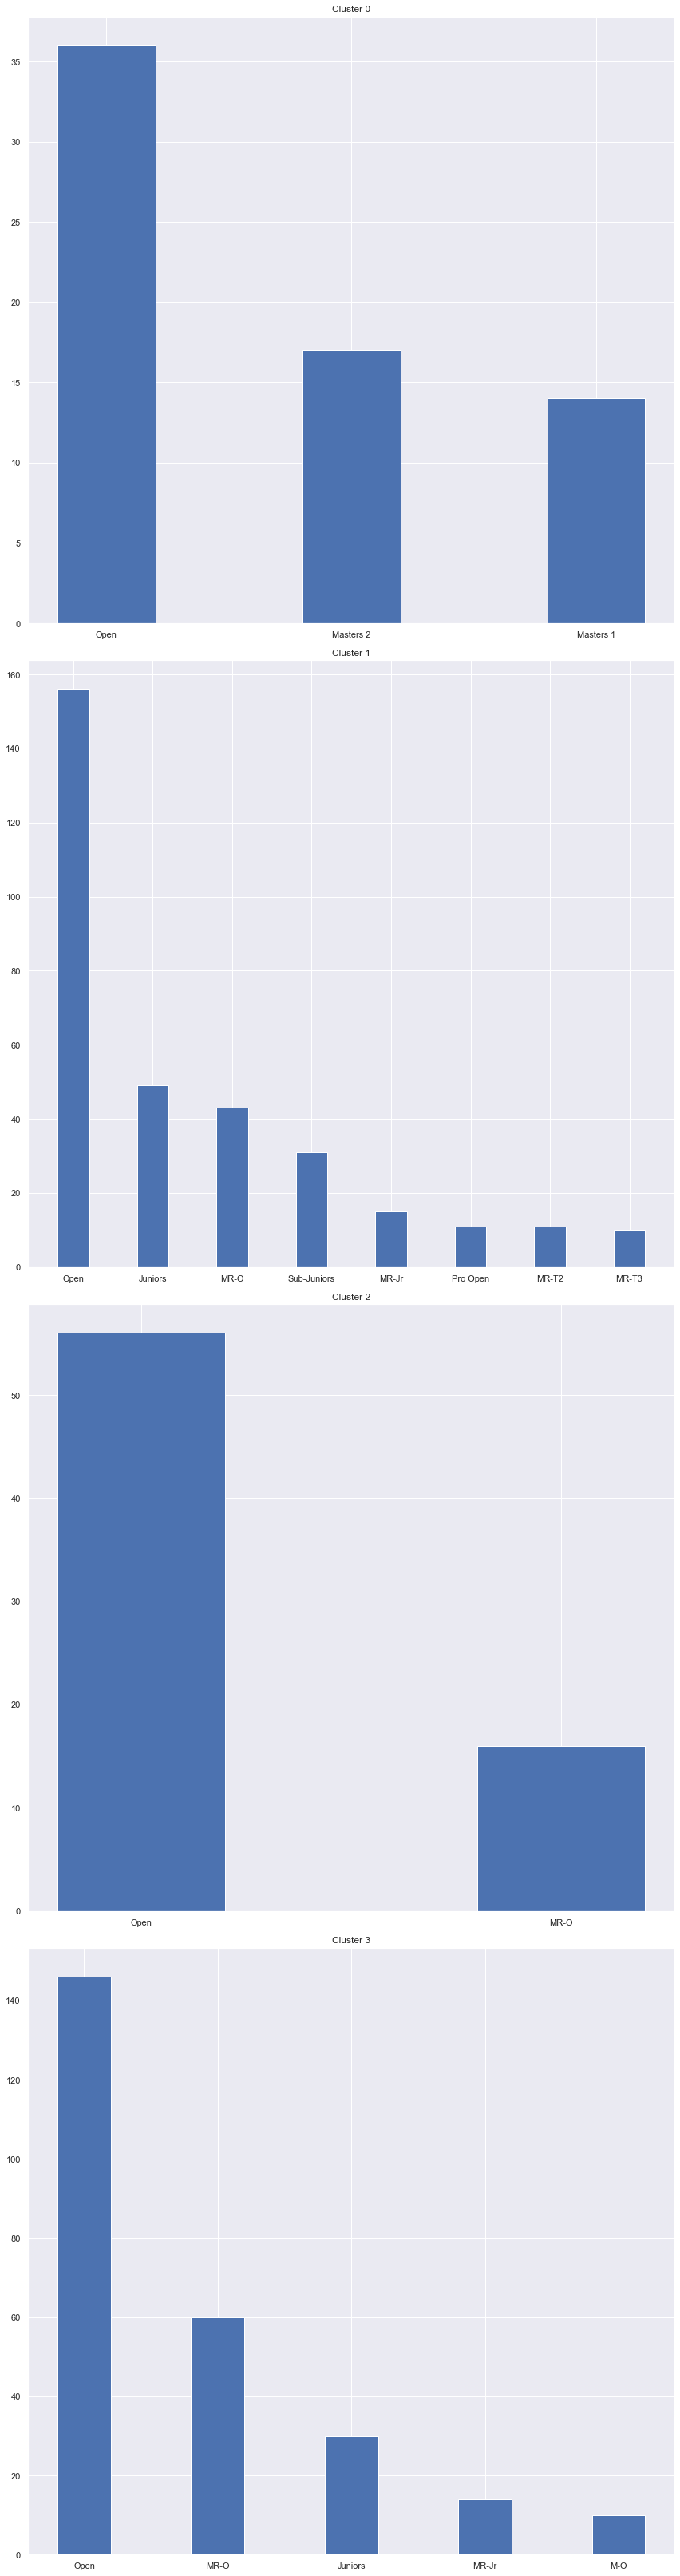

In [128]:
Division_visuals(male_model_copy, True)

In [129]:
## interpretations here, can repeat the process
#  for females by using female_model_data and repeating the steps above

## Exploring `TotalKg`, `BodyweightKg` and `Age`

In [130]:
male_model_data, female_model_data = extract_clean_filter(df, ["BodyweightKg", "TotalKg", "Age", "Sex", "Division"])

/var/folders/dz/456j1vhd5lj65z33cq93dr7m0000gn/T/ipykernel_67279/1176011492.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data.dropna(axis=0, inplace=True)


In [132]:
male_model_data

,BodyweightKg,TotalKg,Age,Sex,Division
7,110.00,687.50,23.0,M,M-C
8,89.20,552.50,58.0,M,Open
10,68.76,247.20,14.0,M,MR-T1
15,98.34,965.00,34.0,M,MO-AD
17,61.85,347.50,16.0,M,Juniors
...,...,...,...,...,...
2992,82.50,675.85,26.0,M,Open
2994,58.39,465.00,17.0,M,Open
2996,73.10,610.00,24.0,M,MR-O
2998,88.31,537.50,27.0,M,Open


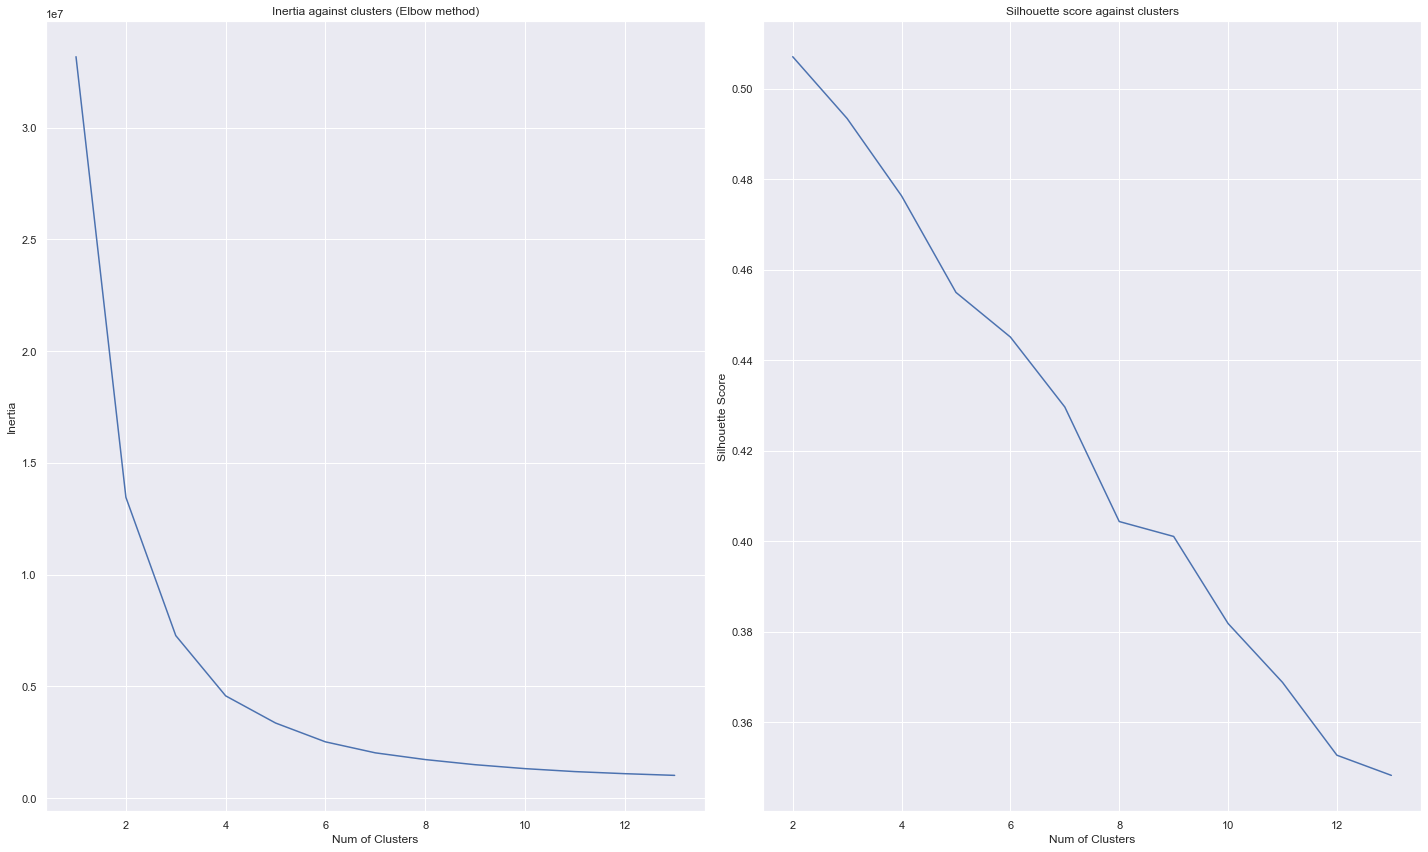

In [133]:
optimal_clusters(13, male_model_data[["BodyweightKg", "TotalKg", "Age"]])

Features	BodyweightKg	TotalKg	Age	
Cluster 0:	95.63	638.68	30.06	
Cluster 1:	85.05	506.87	28.53	
Cluster 2:	110.67	822.53	31.15	
Cluster 3:	69.86	344.57	24.67	

Inertia:  4577764.953884883


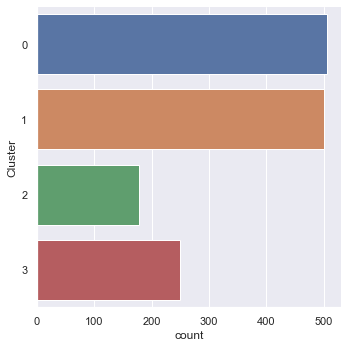

In [138]:
male_model_copy = KMeans_model_fitting(4, male_model_data, ["BodyweightKg", "TotalKg", "Age"], verbose=True)

Cluster  0 :
	 {'Open': 167, 'MR-O': 51, 'Juniors': 27, 'MR-Jr': 19, 'M-O': 13, 'Masters 1': 12, 'Pro Open': 11}

Cluster  1 :
	 {'Open': 112, 'MR-O': 59, 'Juniors': 37, 'Sub-Juniors': 15, 'Masters 2': 12}

Cluster  3 :
	 {'Open': 32, 'Sub-Juniors': 23, 'Juniors': 15}

Cluster  2 :
	 {'Open': 83}



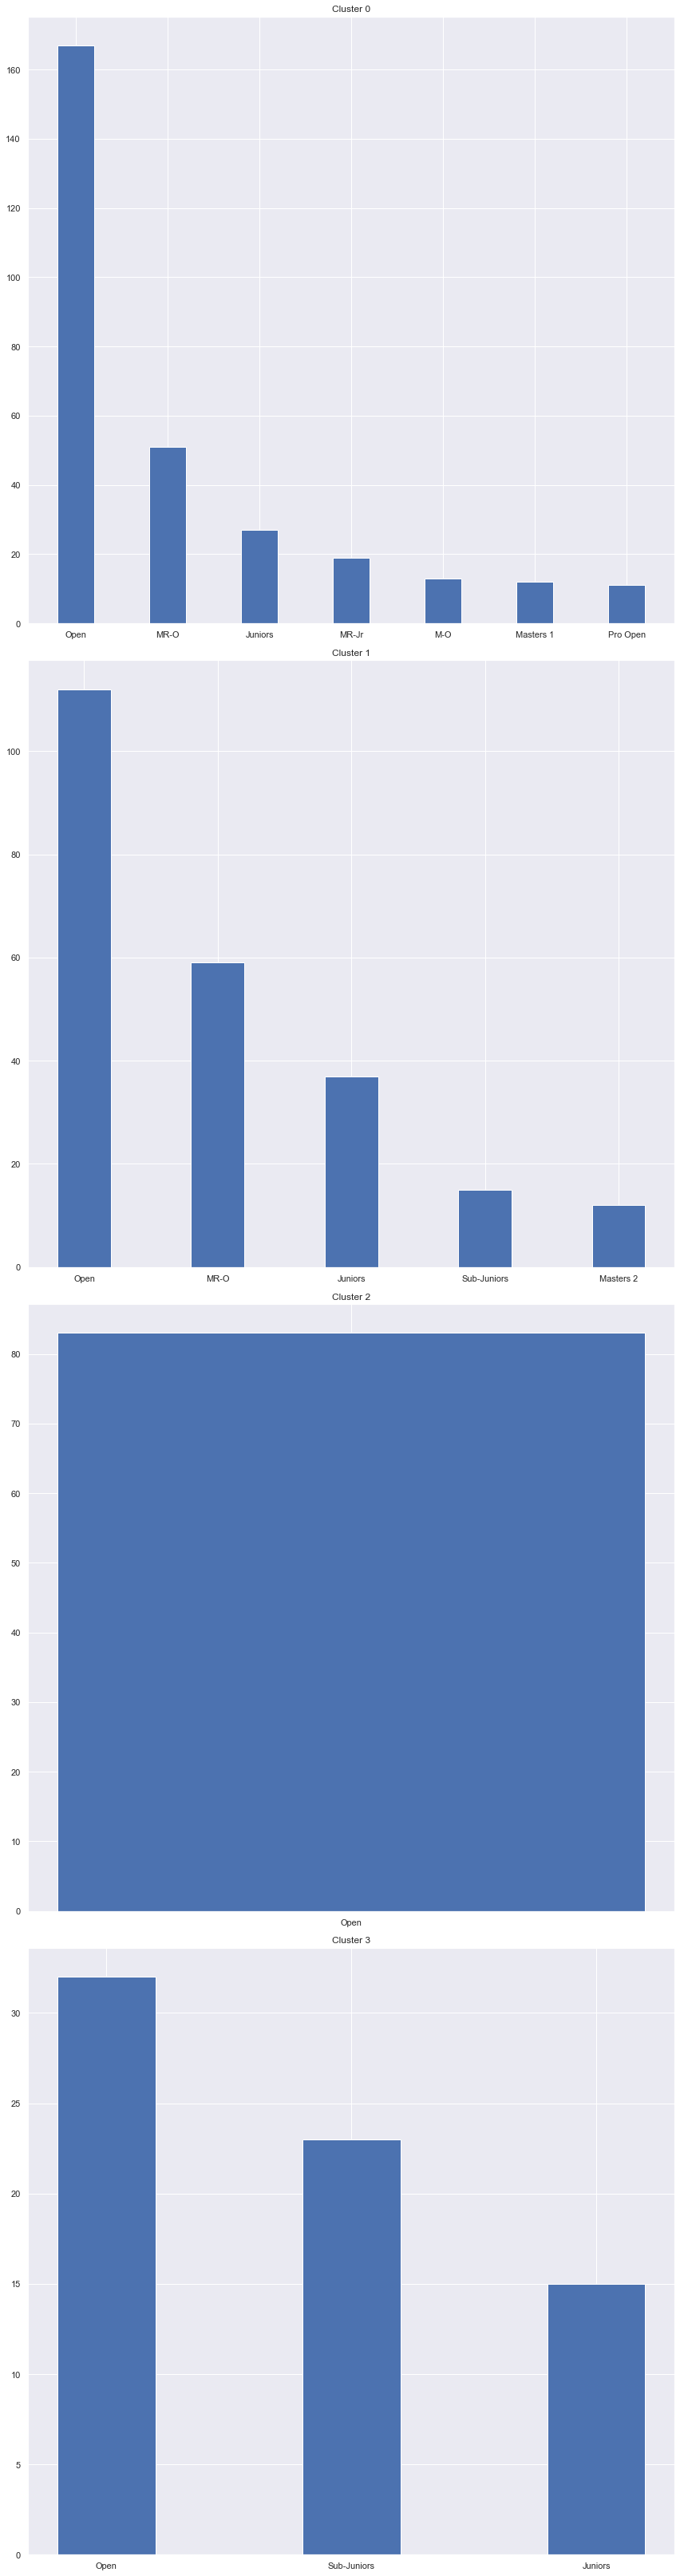

In [139]:
Division_visuals(male_model_copy, True)

In [ ]:
## intepretations here, can run for females too